In [ ]:
## Reading Files
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import sklearn
import plotly.express as px
from pandas import Period
from scipy import stats
import re

In [ ]:
%matplotlib inline

## Target Profit Margin Dataset

In [ ]:
tg_pm_df = pd.read_csv('/content/drive/MyDrive/Capstone Data/target_margin.csv',skiprows=2,usecols=[0,1,2,3,4,17,18,19])

In [ ]:
tg_pm_df = tg_pm_df.rename(columns=lambda x:x.strip())

In [ ]:
tg_pm_df = tg_pm_df.melt(id_vars=['Product Class'],value_vars=['Good','Better','Best'],var_name='Category',value_name='Values')

In [ ]:
tg_pm_df[tg_pm_df['Product Class']=='POWACC']

Product Class Category Values
0          POWACC     Good    38%
417        POWACC   Better    36%
834        POWACC     Best    34%

In [ ]:
target_product_ls = list(tg_pm_df['Product Class'].unique())

We do have some information about 21.22 expected profit margin, but might not be helpful since they have 5 categories.

## Profit Margin Exploration

In [ ]:
profit_df = pd.read_csv('/content/drive/MyDrive/Capstone Data/pm_dataset.csv',low_memory=False)

In [ ]:
profit_df['Year-Month'] = profit_df['Year'].astype(str) + '-' + profit_df['Month'].astype(str)
profit_df['Year-Month'] = pd.to_datetime(profit_df['Year-Month'], format='%Y-%m')

In [ ]:
profit_df = profit_df[(~(profit_df['customer_category']=='Average Cost')) & (~(profit_df['customer_category']=='List Price'))]

In [ ]:
profit_df = profit_df[(profit_df['Group']=='Const Supplies CS/SD')|(profit_df['Group']=='Welding Equip WS/SD')]
profit_df = profit_df[profit_df['Own'] == False]

In [ ]:
# profit_df = profit_df[profit_df['Profit_Margin']>-15]

In [ ]:
profit_df[profit_df['Profit_Margin'] == 0]['customer_name'].value_counts()

customer_name
TIC - VENTURE GLOBAL-STRIKEFORCE - CLOSED    606
EMPLOYEE ACCOUNT                             181
INACTIVE KIEWIT POWER CONST. WHS 152         132
WOOD-MIZER LLC WHSE 500                       93
INACTIVE B&W/WHSE 173                         60
                                            ... 
MODERN MAINTENANCE INC.                        1
JOHN R. JURGENSEN CO                           1
BADGER INDUSTRIES                              1
NATIONAL STEEL CITY ERECTING                   1
ME&I CONSTRUCTION SERVICES, INC                1
Name: count, Length: 142, dtype: int64

In [ ]:
final_df = profit_df.groupby(['Year','Month','Group','customer_category','Product_Class','Stock'])['Profit_Margin'].median().reset_index()

In [ ]:
final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(day=1))

<Axes: xlabel='Profit_Margin', ylabel='Count'>

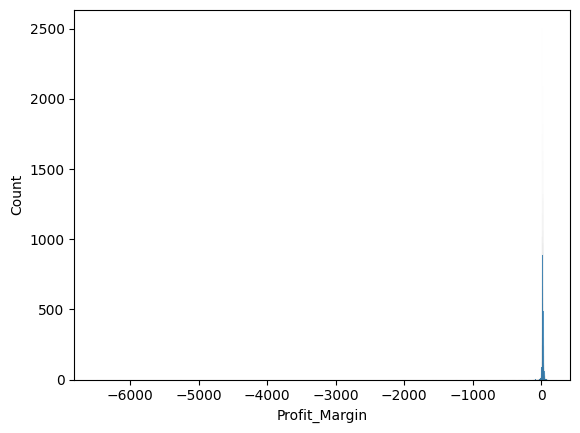

In [ ]:
sns.histplot(final_df['Profit_Margin'])

In [ ]:
product_check = final_df.groupby(['Group','Product_Class']).agg({'Date': 'nunique'}).reset_index()

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

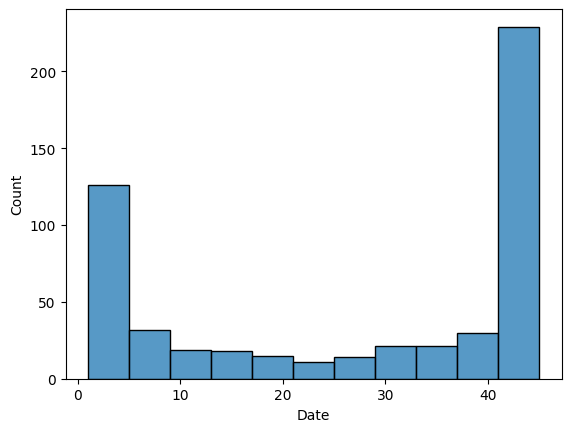

In [ ]:
sns.histplot(product_check['Date'])
sns.histplot

In [ ]:
product_check['Date'].value_counts()

Date
45    168
1      64
44     26
3      23
2      23
43     19
4      16
6      12
40      9
37      8
5       8
42      8
30      8
41      8
39      8
7       8
9       8
36      7
14      7
15      7
12      6
33      6
32      6
19      6
38      5
25      5
24      5
17      4
8       4
27      4
18      4
34      4
35      4
31      4
26      3
29      3
11      3
23      3
21      2
28      2
16      2
10      2
13      2
22      1
20      1
Name: count, dtype: int64

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Capstone Data/final_dataset.csv',index=False)

In [ ]:
final_qt_df = profit_df.groupby(['Quarter','Group','customer_category','Product_Class','Stock'])['Profit_Margin'].median().reset_index()

In [ ]:
final_qt_df.to_csv('/content/drive/MyDrive/Capstone Data/final_quarter_dataset.csv',index=False)

In [ ]:
final_df

Year  Month                 Group customer_category Product_Class  \
0      2020      1  Const Supplies CS/SD              Best        ABRFLW   
1      2020      1  Const Supplies CS/SD              Best        ABRMAN   
2      2020      1  Const Supplies CS/SD              Best        ABRMIS   
3      2020      1  Const Supplies CS/SD              Best        ABRRFD   
4      2020      1  Const Supplies CS/SD              Best        BRUBRO   
...     ...    ...                   ...               ...           ...   
47152  2023      9   Welding Equip WS/SD              Good        WLDDRI   
47153  2023      9   Welding Equip WS/SD              Good        WLDEMF   
47154  2023      9   Welding Equip WS/SD              Good        WLDEMF   
47155  2023      9   Welding Equip WS/SD              Good        WLDMIS   
47156  2023      9   Welding Equip WS/SD              Good        WLDOPT   

      Stock  Profit_Margin       Date  
0         Y      29.250898 2020-01-01  
1         N      43.715031 2020-01-01  
2         N      25.501433 2020-01-01  
3         N      34.000000 2020-01-01  
4         Y      12.946461 2020-01-01  
...     ...            ...        ...  
47152     N      34.997854 2023-09-01  
47153     N       7.000388 2023-09-01  
47154     Y      20.000000 2023-09-01  
47155     N      18.000000 2023-09-01  
47156     N       5.166664 2023-09-01  

[47157 rows x 8 columns]

#### Actual - Expected Profit Margin Exploration

Here we generate both mean and median profit margin values.

In [ ]:
final_df_median_pm = final_df.groupby(['Year','Group','Product_Class','customer_category',])['Profit_Margin'].median().reset_index()

In [ ]:
final_df_median_pm.to_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_median_data.csv',index=False)

In [ ]:
final_df_median_pm

Year                 Group        Product_Class customer_category  \
0     2020  Const Supplies CS/SD               ABRBEL            Better   
1     2020  Const Supplies CS/SD               ABRBEL              Good   
2     2020  Const Supplies CS/SD               ABRBEN              Best   
3     2020  Const Supplies CS/SD               ABRBEN            Better   
4     2020  Const Supplies CS/SD               ABRBEN              Good   
...    ...                   ...                  ...               ...   
4532  2023   Welding Equip WS/SD               WLDWIR            Better   
4533  2023   Welding Equip WS/SD               WLDWIR              Good   
4534  2023   Welding Equip WS/SD  Welding Equip WS/SD              Best   
4535  2023   Welding Equip WS/SD  Welding Equip WS/SD            Better   
4536  2023   Welding Equip WS/SD  Welding Equip WS/SD              Good   

      Profit_Margin  
0         27.160494  
1         28.070175  
2         31.144928  
3         23.313253  
4         19.461078  
...             ...  
4532       6.000235  
4533       9.734400  
4534      25.497303  
4535      40.243902  
4536      39.997994  

[4537 rows x 5 columns]

In [ ]:
final_df_mean_pm = final_df.groupby(['Year','Group','Product_Class','customer_category',])['Profit_Margin'].mean().reset_index()

In [ ]:
final_df_mean_pm.to_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_mean_data.csv',index=False)

In [ ]:
final_df_mean_pm

Year                 Group        Product_Class customer_category  \
0     2020  Const Supplies CS/SD               ABRBEL            Better   
1     2020  Const Supplies CS/SD               ABRBEL              Good   
2     2020  Const Supplies CS/SD               ABRBEN              Best   
3     2020  Const Supplies CS/SD               ABRBEN            Better   
4     2020  Const Supplies CS/SD               ABRBEN              Good   
...    ...                   ...                  ...               ...   
4532  2023   Welding Equip WS/SD               WLDWIR            Better   
4533  2023   Welding Equip WS/SD               WLDWIR              Good   
4534  2023   Welding Equip WS/SD  Welding Equip WS/SD              Best   
4535  2023   Welding Equip WS/SD  Welding Equip WS/SD            Better   
4536  2023   Welding Equip WS/SD  Welding Equip WS/SD              Good   

      Profit_Margin  
0         27.216164  
1         27.802866  
2         34.326971  
3         24.905499  
4         19.746783  
...             ...  
4532       6.000235  
4533       9.734400  
4534      36.888659  
4535      34.498130  
4536      39.997994  

[4537 rows x 5 columns]

After consideration, we used median value to validate actual profit margins.

In [ ]:
final_df_20_23_median = final_df_median_pm.merge(tg_pm_df, how='left',left_on=['Product_Class', 'customer_category'],right_on=['Product Class', 'Category'],indicator=True)

In [ ]:
final_df_20_23_median

Year                 Group        Product_Class customer_category  \
0     2020  Const Supplies CS/SD               ABRBEL            Better   
1     2020  Const Supplies CS/SD               ABRBEL              Good   
2     2020  Const Supplies CS/SD               ABRBEN              Best   
3     2020  Const Supplies CS/SD               ABRBEN            Better   
4     2020  Const Supplies CS/SD               ABRBEN              Good   
...    ...                   ...                  ...               ...   
4532  2023   Welding Equip WS/SD               WLDWIR            Better   
4533  2023   Welding Equip WS/SD               WLDWIR              Good   
4534  2023   Welding Equip WS/SD  Welding Equip WS/SD              Best   
4535  2023   Welding Equip WS/SD  Welding Equip WS/SD            Better   
4536  2023   Welding Equip WS/SD  Welding Equip WS/SD              Good   

      Profit_Margin Product Class Category Values     _merge  
0         27.160494        ABRBEL   Better    36%       both  
1         28.070175        ABRBEL     Good    38%       both  
2         31.144928        ABRBEN     Best    34%       both  
3         23.313253        ABRBEN   Better    36%       both  
4         19.461078        ABRBEN     Good    38%       both  
...             ...           ...      ...    ...        ...  
4532       6.000235        WLDWIR   Better    15%       both  
4533       9.734400        WLDWIR     Good    20%       both  
4534      25.497303           NaN      NaN    NaN  left_only  
4535      40.243902           NaN      NaN    NaN  left_only  
4536      39.997994           NaN      NaN    NaN  left_only  

[4537 rows x 9 columns]

In [ ]:
final_df_20_23_median['_merge'].value_counts()

_merge
both          4294
left_only      243
right_only       0
Name: count, dtype: int64

In [ ]:
final_df_20_23_median = final_df_20_23_median.rename(columns={'Values':'Target Margin'})

#### Median figure generation

In [ ]:
excluded_items = final_df_20_23_median[final_df_20_23_median['_merge']=='left_only']

In [ ]:
final_df_20_23_median = final_df_20_23_median[final_df_20_23_median['_merge'] == 'both']

In [ ]:
final_df_20_23_median = final_df_20_23_median[(final_df_20_23_median['Group'] == 'Const Supplies CS/SD')|(final_df_20_23_median['Group'] == 'Welding Equip WS/SD')]

In [ ]:
final_df_20_23_median

Year                 Group Product_Class customer_category  \
0     2020  Const Supplies CS/SD        ABRBEL            Better   
1     2020  Const Supplies CS/SD        ABRBEL              Good   
2     2020  Const Supplies CS/SD        ABRBEN              Best   
3     2020  Const Supplies CS/SD        ABRBEN            Better   
4     2020  Const Supplies CS/SD        ABRBEN              Good   
...    ...                   ...           ...               ...   
4529  2023   Welding Equip WS/SD        WLDPAR            Better   
4530  2023   Welding Equip WS/SD        WLDSPG              Good   
4531  2023   Welding Equip WS/SD        WLDWIR              Best   
4532  2023   Welding Equip WS/SD        WLDWIR            Better   
4533  2023   Welding Equip WS/SD        WLDWIR              Good   

      Profit_Margin Product Class Category Target Margin _merge  
0         27.160494        ABRBEL   Better           36%   both  
1         28.070175        ABRBEL     Good           38%   both  
2         31.144928        ABRBEN     Best           34%   both  
3         23.313253        ABRBEN   Better           36%   both  
4         19.461078        ABRBEN     Good           38%   both  
...             ...           ...      ...           ...    ...  
4529      36.364645        WLDPAR   Better           36%   both  
4530       9.999804        WLDSPG     Good           20%   both  
4531       9.500042        WLDWIR     Best           10%   both  
4532       6.000235        WLDWIR   Better           15%   both  
4533       9.734400        WLDWIR     Good           20%   both  

[4294 rows x 9 columns]

In [ ]:
final_df_20_23_median = final_df_20_23_median.sort_values(['Group','customer_category'])

In [ ]:
final_df_20_23_median.drop(columns='_merge',inplace=True)

In [ ]:
final_df_20_23_median['Target Margin'] = final_df_20_23_median['Target Margin'].str.replace('%', '').astype(float)

In [ ]:
final_df_20_23_median['Margin Difference(%)'] = final_df_20_23_median['Profit_Margin'] - final_df_20_23_median['Target Margin']

In [ ]:
final_df_20_23_median.to_csv("/content/drive/MyDrive/Capstone Data/20_23_pm_diff.csv")

In [ ]:
final_df_20_23_median['Year'].value_counts()

Year
2022    1147
2021    1054
2020    1051
2023    1042
Name: count, dtype: int64

In [ ]:
final_df_20_23_median

Year                 Group Product_Class customer_category  \
2     2020  Const Supplies CS/SD        ABRBEN              Best   
5     2020  Const Supplies CS/SD        ABRCAR              Best   
7     2020  Const Supplies CS/SD        ABRCON              Best   
11    2020  Const Supplies CS/SD        ABRCUT              Best   
12    2020  Const Supplies CS/SD        ABRFLD              Best   
...    ...                   ...           ...               ...   
4521  2023   Welding Equip WS/SD        WLDGAS              Good   
4524  2023   Welding Equip WS/SD        WLDMIS              Good   
4527  2023   Welding Equip WS/SD        WLDOPT              Good   
4530  2023   Welding Equip WS/SD        WLDSPG              Good   
4533  2023   Welding Equip WS/SD        WLDWIR              Good   

      Profit_Margin Product Class Category  Target Margin  \
2         31.144928        ABRBEN     Best           34.0   
5         12.187484        ABRCAR     Best           34.0   
7         21.507175        ABRCON     Best           34.0   
11        16.883117        ABRCUT     Best           34.0   
12        23.860540        ABRFLD     Best           34.0   
...             ...           ...      ...            ...   
4521       3.301793        WLDGAS     Good           20.0   
4524      18.000000        WLDMIS     Good           20.0   
4527      24.366529        WLDOPT     Good           20.0   
4530       9.999804        WLDSPG     Good           20.0   
4533       9.734400        WLDWIR     Good           20.0   

      Margin Difference(%)  
2                -2.855072  
5               -21.812516  
7               -12.492825  
11              -17.116883  
12              -10.139460  
...                    ...  
4521            -16.698207  
4524             -2.000000  
4527              4.366529  
4530            -10.000196  
4533            -10.265600  

[4294 rows x 9 columns]

### Visualizations for Profit Margin Diff

In [ ]:
def plot_margin(df, year, customer_category):
    df = df[(df['Customer Category'] == customer_category) & (df['Year'] == year)]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Difference'], hue="Item Group")
    # Remove tick labels for x-axis
    plt.xticks([])
    plt.ylabel('Difference between Actual and Expected Profit Margin (in %)')
    plt.title(f'The Difference between Actual Profit Margin and Expected Profit Margin in {year} by Product Class and {customer_category} Customer.')
    plt.axhline(y=0, color="black", linestyle="--")
    # for index, row in df.iterrows():
    #     difference = row['Actual Margin'] - row['Target Margin']
    #     if difference < -10:  # Define your threshold for large values
    #         plt.text(row["Product Class"], difference, f"{row['Product Class']}: {difference:.2f}", ha='center', va='bottom', fontsize=8, color='blue')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

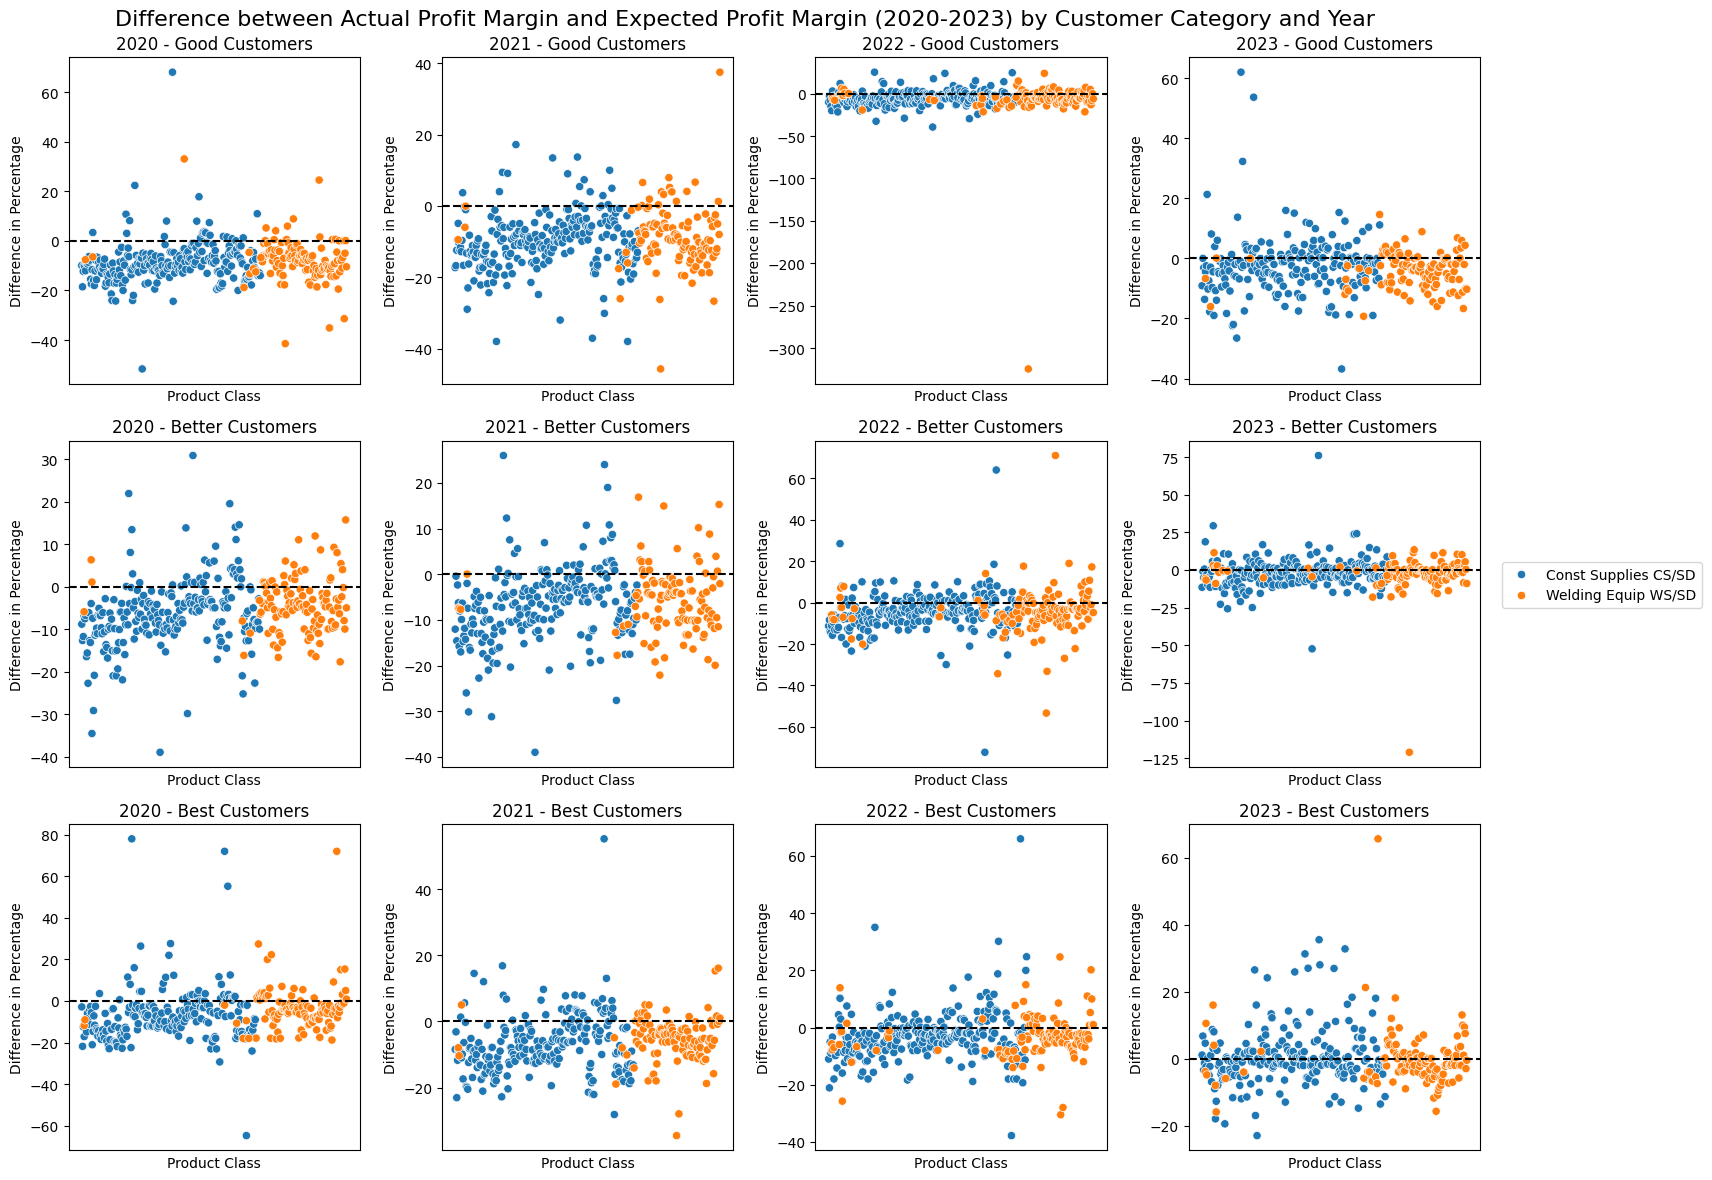

In [ ]:
def plot_margin(ax, df, year, customer_category):
    df = df[(df['customer_category'] == customer_category) & (df['Year'] == year)]
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Margin Difference(%)'], hue="Group", ax=ax)
    # Remove tick labels for x-axis
    ax.set_xticks([])
    ax.axhline(y=0, color="black", linestyle="--")
    ax.legend_.remove()
    ax.set_ylabel('Difference in Percentage')
    ax.set_title(f'{year} - {customer_category.capitalize()} Customers')


years = [2020,2021,2022, 2023]
customer_categories = ['Good', 'Better','Best']

fig, axes = plt.subplots(nrows=len(customer_categories), ncols=len(years), figsize=(15, 12))

for i, customer_category in enumerate(customer_categories):
    for j, year in enumerate(years):
        ax = axes[i][j]
        plot_margin(ax, final_df_20_23_median, year, customer_category)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Difference between Actual Profit Margin and Expected Profit Margin (2020-2023) by Customer Category and Year', fontsize=16)

plt.tight_layout()
plt.show()

### [-25, 25] Difference range trend

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_median_data.csv')

In [ ]:
df.columns

Index(['Year', 'Group', 'Product_Class', 'customer_category', 'Profit_Margin'], dtype='object')

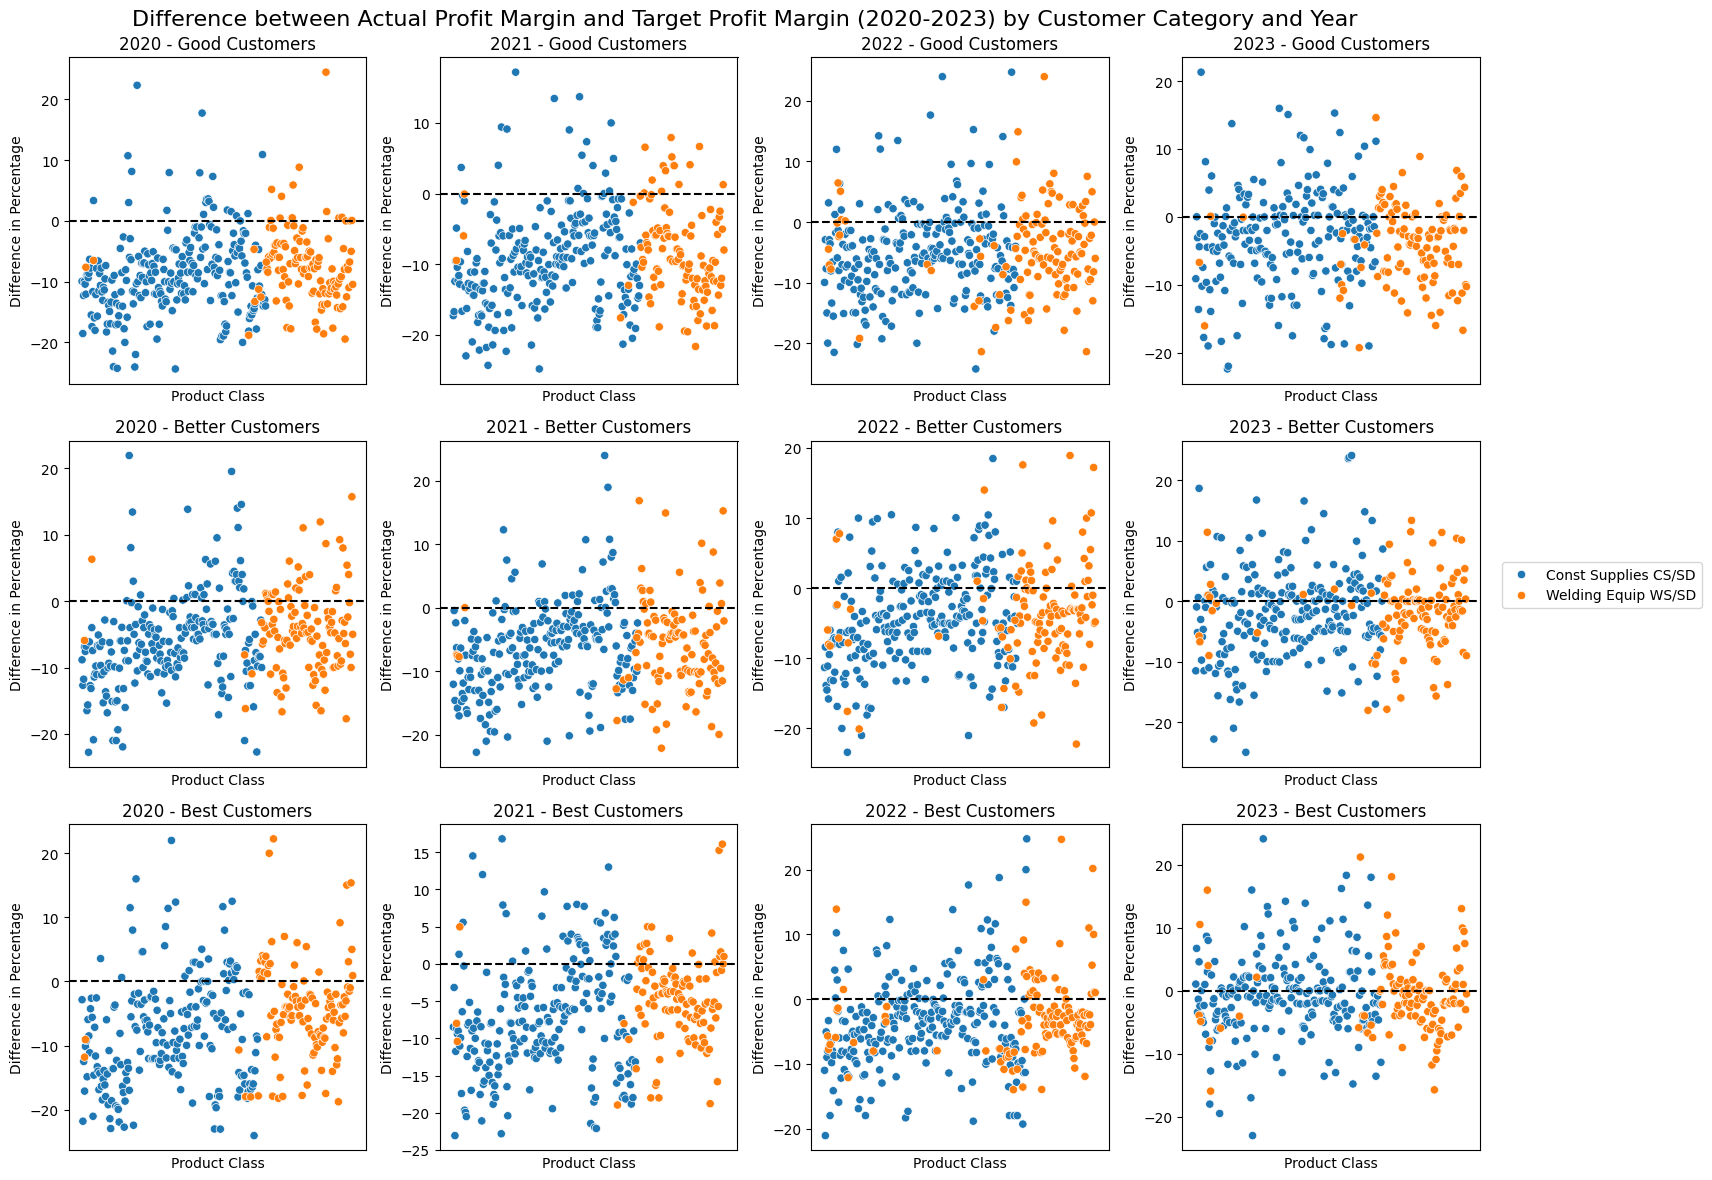

In [ ]:
def plot_margin(ax, df, year, customer_category):
    df = df[(df['customer_category'] == customer_category) & (df['Year'] == year)]
    df = df[(df['Margin Difference(%)'] >= -25) & (df['Margin Difference(%)'] <= 25)]
    sns.scatterplot(data=df, x=df["Product Class"], y=df['Margin Difference(%)'], hue="Group", ax=ax)
    # Remove tick labels for x-axis
    ax.set_xticks([])
    ax.axhline(y=0, color="black", linestyle="--")
    ax.legend_.remove()
    ax.set_ylabel('Difference in Percentage')
    ax.set_title(f'{year} - {customer_category.capitalize()} Customers')


years = [2020,2021,2022, 2023]
customer_categories = ['Good', 'Better', 'Best']

fig, axes = plt.subplots(nrows=len(customer_categories), ncols=len(years), figsize=(15, 12))

for i, customer_category in enumerate(customer_categories):
    for j, year in enumerate(years):
        ax = axes[i][j]
        plot_margin(ax, final_df_20_23_median, year, customer_category)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Difference between Actual Profit Margin and Target Profit Margin (2020-2023) by Customer Category and Year', fontsize=16)

plt.tight_layout()
plt.show()

### Statistical Significance

In [ ]:
final_df_23_median = final_df_20_23_median[final_df_20_23_median['Year'] == 2023]

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


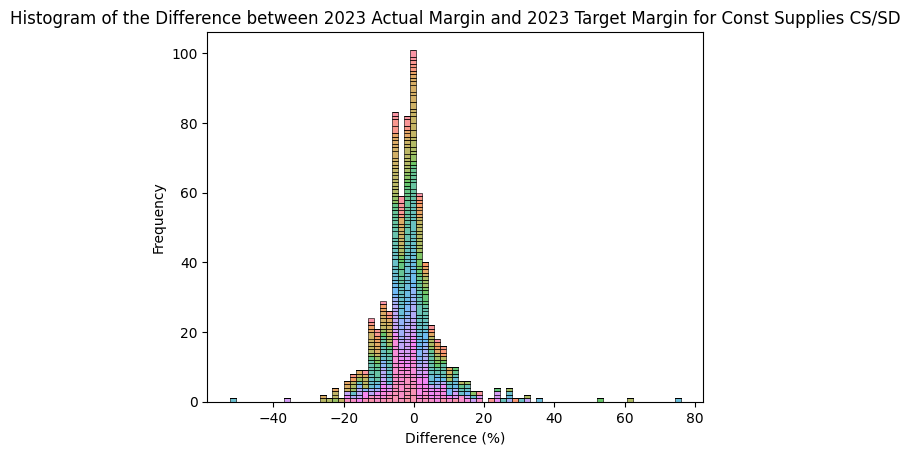

In [ ]:
sns.histplot(data=final_df_23_median[final_df_23_median['Group'] == 'Const Supplies CS/SD'], x=final_df_23_median['Profit_Margin'] - final_df_23_median['Target Margin'], hue="Product Class", multiple="stack", legend=False)
plt.xlabel('Difference (%)')
plt.ylabel('Frequency')
plt.title('Histogram of the Difference between 2023 Actual Margin and 2023 Target Margin for Const Supplies CS/SD')
plt.show()

The normality assumption of the difference in paired sample t-test is satisfied.

In [ ]:
def item_test(df, group, customer_category, year):
  # Filter the DataFrame
  filtered_df = df.loc[(df['Group'] == group) & (df['Category'] == customer_category) & (df['Year'] == year)]

  # Now perform the t-test with the cleaned DataFrame
  t_statistic, p_value = stats.ttest_rel(filtered_df['Profit_Margin'], filtered_df['Target Margin'])
  return p_value


In [ ]:
welding_p_value = {2020:[],2021:[],2022:[],2023:[]}
for i in final_df_20_23_median['Group'].unique():
  for j in ['Good','Better','Best']:
    print(j)
    for k in final_df_20_23_median['Year'].unique():
      res = item_test(final_df_20_23_median, i, j,k)
      print(f'The p-value for {j} customer in {i} in {k} is {res}')
      if i == 'Const Supplies CS/SD':
        welding_p_value[k].append(res)

Good
The p-value for Good customer in Const Supplies CS/SD in 2020 is 4.379435185533768e-38
The p-value for Good customer in Const Supplies CS/SD in 2021 is 1.2248286228624796e-51
The p-value for Good customer in Const Supplies CS/SD in 2022 is 5.579356964657473e-21
The p-value for Good customer in Const Supplies CS/SD in 2023 is 0.0004075770974126381
Better
The p-value for Better customer in Const Supplies CS/SD in 2020 is 1.6245156422197352e-24
The p-value for Better customer in Const Supplies CS/SD in 2021 is 2.1461476638272236e-28
The p-value for Better customer in Const Supplies CS/SD in 2022 is 1.1794752125457718e-12
The p-value for Better customer in Const Supplies CS/SD in 2023 is 0.007889028400520762
Best
The p-value for Best customer in Const Supplies CS/SD in 2020 is 2.9032588186610807e-13
The p-value for Best customer in Const Supplies CS/SD in 2021 is 1.1359100481943828e-25
The p-value for Best customer in Const Supplies CS/SD in 2022 is 3.331891237938824e-08
The p-value f

In [ ]:
result = pd.DataFrame(welding_p_value)
result.index = ['Good','Better','Best']
result

2020          2021          2022      2023
Good    4.379435e-38  1.224829e-51  5.579357e-21  0.000408
Better  1.624516e-24  2.146148e-28  1.179475e-12  0.007889
Best    2.903259e-13  1.135910e-25  3.331891e-08  0.575435

We can tell the target margins are probably achieved in best customer category, but not achieved in the other category.  

If we only care if the actual margin exceeds the target margin, we can perform one sided t-test.

In [ ]:
def one_sided_ttest(df, group, customer_category):
  # Filter the DataFrame
  filtered_df = df.loc[(df['Item Group'] == group) & (df['Category'] == customer_category)]

  # Perform the one-sided t-test
  t_statistic, p_value = stats.ttest_rel(filtered_df['Actual Margin'], filtered_df['Target Margin'], alternative='greater')

  return p_value



In [ ]:
for i in final_df_23_median['Item Group'].unique():
  for j in final_df_23_median['Customer Category'].unique():
    print(f'The p-value for {j} customer in {i} in 2023 is {one_sided_ttest(final_df_23_median, i, j)}')

KeyError: 'Item Group'

In [ ]:
one_sided_ttest(final_df_23_median, 'Const Supplies CS/SD', 'Good')

## Outliers

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Data/20_23_pm_diff.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.describe(include='all')

Year                 Group Product_Class customer_category  \
count   4294.000000                  4294          4294              4294   
unique          NaN                     2           396                 3   
top             NaN  Const Supplies CS/SD        ABRFLD              Good   
freq            NaN                  2830            24              1433   
mean    2021.507685                   NaN           NaN               NaN   
std        1.106831                   NaN           NaN               NaN   
min     2020.000000                   NaN           NaN               NaN   
25%     2021.000000                   NaN           NaN               NaN   
50%     2022.000000                   NaN           NaN               NaN   
75%     2022.000000                   NaN           NaN               NaN   
max     2023.000000                   NaN           NaN               NaN   

        Profit_Margin Product Class Category  Target Margin  \
count     4294.000000          4294     4294    4294.000000   
unique            NaN           396        3            NaN   
top               NaN        ABRFLD     Good            NaN   
freq              NaN            24     1433            NaN   
mean        25.025937           NaN      NaN      30.102003   
std         10.242005           NaN      NaN       6.554531   
min       -282.594340           NaN      NaN      10.000000   
25%         20.011791           NaN      NaN      26.000000   
50%         24.959547           NaN      NaN      29.000000   
75%         29.163722           NaN      NaN      36.000000   
max        100.000000           NaN      NaN      42.000000   

        Margin Difference(%)  
count            4294.000000  
unique                   NaN  
top                      NaN  
freq                     NaN  
mean               -5.076066  
std                10.625537  
min              -324.594340  
25%                -9.994497  
50%                -5.028871  
75%                -0.553975  
max                78.000000

In [ ]:
products = pd.read_csv('/content/drive/MyDrive/Capstone Data/product_desc.csv')

In [ ]:
def convert_category(row):
  if row['Product Group'] == 'WLD':
    return 'A-WLD'
  else:
    return row['Product Category']

In [ ]:
products['Product Category']= products.apply(convert_category,axis=1)

In [ ]:
products['Product Category'].value_counts()

Product Category
C        128
B        119
D        105
E         33
A         17
A-WLD     14
Name: count, dtype: int64

In [ ]:
add_df = df.merge(products,on=['Product Class'],indicator=True)

In [ ]:
add_df = add_df.groupby(['Year','Product Category','customer_category'])[['Target Margin','Profit_Margin']].mean().reset_index()

In [ ]:
add_df['Margin Diff(%)'] = add_df['Profit_Margin'] - add_df['Target Margin']

In [ ]:
add_df.to_csv('/content/drive/MyDrive/Capstone Data/product_category.csv')

##### 1. Consistent below performance

In [ ]:
total_num = df.groupby(['Product_Class'])['Profit_Margin'].count().reset_index()

In [ ]:
below = df[df['Margin Difference(%)'] < 0].groupby(['Group','Product_Class'])['Profit_Margin'].count().reset_index()

In [ ]:
bad_df = total_num.merge(below, on=['Product_Class'],how='left')

In [ ]:
bad_df['prop']=bad_df['Profit_Margin_y']/bad_df['Profit_Margin_x']*100

In [ ]:
product_df = bad_df[bad_df['prop']>80].merge(products,how='inner',left_on='Product_Class',right_on='Product Class')

In [ ]:
list1 = product_df['Product_Class'].unique().tolist()

In [ ]:
product_df[['Product Class','Line Description','Product Group','Product Group Description']].to_csv('/content/drive/MyDrive/Capstone Data/bad_product_80.csv')

In [ ]:
above = df[df['Margin Difference(%)'] > 0].groupby(['Product_Class'])['Profit_Margin'].count().reset_index()

In [ ]:
good_df = total_num.merge(above, on=['Product_Class'],how='left')

In [ ]:
good_df['prop']=good_df['Profit_Margin_y']/good_df['Profit_Margin_x']*100

In [ ]:
product_df = good_df[good_df['prop']>80].merge(products,how='inner',left_on='Product_Class',right_on='Product Class')

In [ ]:
product_df[['Product Class','Line Description','Product Group','Product Group Description']].to_csv('/content/drive/MyDrive/Capstone Data/good_product_80.csv')

In [ ]:
list2 = product_df['Product_Class'].unique().tolist()

In [ ]:
intersection_set = set(list1).intersection(set(list2))
intersection_list = list(intersection_set)
print(intersection_list)

[]


##### 2. The median of profit margin difference below 10

In [ ]:
result_df = df.groupby(['Product_Class'])['Margin Difference(%)'].median().reset_index()
result_df = result_df[result_df['Margin Difference(%)']<-5].merge(products,how='inner',left_on='Product_Class',right_on='Product Class')
result_df[['Product Class','Line Description','Product Group','Product Group Description']].to_csv('/content/drive/MyDrive/Capstone Data/bad_product_50.csv')

In [ ]:
bad_product_list = result_df['Product_Class'].unique().tolist()

In [ ]:
result_df = df.groupby(['Product_Class'])['Margin Difference(%)'].median().reset_index()
result_df = result_df[result_df['Margin Difference(%)']>10].merge(products,how='inner',left_on='Product_Class',right_on='Product Class')
result_df[['Product Class','Line Description','Product Group','Product Group Description']].to_csv('/content/drive/MyDrive/Capstone Data/good_product_50.csv')

In [ ]:
good_product_list = result_df['Product_Class'].unique().tolist()

## Outlier Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

##### Less Granular Exploration

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Capstone Data/pm_dataset.csv')

In [ ]:
ds.describe()

Year          Month       Quantity           Cost  \
count  568081.000000  568081.000000  568081.000000  568081.000000   
mean     2020.976053       6.437587      38.303405      47.628396   
std         0.894170       3.347197     607.074462     497.433097   
min      2020.000000       1.000000       0.000000       0.000000   
25%      2020.000000       3.000000       1.000000       2.430000   
50%      2021.000000       7.000000       4.000000       6.720000   
75%      2021.000000       9.000000      12.000000      19.130000   
max      2023.000000      12.000000  100440.000000  135000.000000   

              Price  Profit_Margin  
count  568081.00000  568081.000000  
mean       59.88832      22.417768  
std       627.50546      66.244615  
min         0.01000  -33023.209169  
25%         3.35000      17.546645  
50%         8.93000      23.996017  
75%        25.19000      30.000000  
max    200000.00000     100.000000

In [ ]:
bad_df = ds[ds['Product_Class'].isin(bad_product_list )]
bad_df = bad_df.merge(products,how='inner',left_on='Product_Class',right_on='Product Class')

In [ ]:
len(bad_df['Product_Class'].unique().tolist())

200

In [ ]:
bad_df = bad_df[['customer_name','customer_category','Profit_Margin','State','Stock','Product Class','Product Group']]
bad_df = bad_df.rename({'Product Class':'product_class','Product Group':'product_group','Profit_Margin':'profit_margin'},axis=1)

In [ ]:
bad_df_cnt = bad_df[bad_df['profit_margin']<0]['product_class'].value_counts().reset_index()

In [ ]:
bad_df_cnt = bad_df_cnt[bad_df_cnt['count'] >= 50]

In [ ]:
bad_df = bad_df[bad_df['product_class'].isin(bad_df_cnt['product_class'].unique().tolist())]

In [ ]:
bad_df=bad_df.dropna()

In [ ]:
bad_df

customer_name customer_category  \
210          INACTIVE KIEWIT POWER CONST. WHS 152              Good   
211          INACTIVE KIEWIT POWER CONST. WHS 152              Good   
212          INACTIVE KIEWIT POWER CONST. WHS 152              Good   
213          INACTIVE KIEWIT POWER CONST. WHS 152              Good   
214          INACTIVE KIEWIT POWER CONST. WHS 152              Good   
...                                           ...               ...   
361240  TIC - VENTURE GLOBAL-STRIKEFORCE - CLOSED            Better   
361241                GEMMA POWER SYSTEMS WHS 170              Good   
361242                GEMMA POWER SYSTEMS WHS 170              Good   
361243       INACTIVE KIEWIT POWER CONST. WHS 152              Good   
361244       INACTIVE KIEWIT POWER CONST. WHS 152              Good   

        profit_margin State Stock product_class product_group  
210         14.498712    IL     Y        ELEBAT           ELE  
211         22.000000    IL     Y        ELEBAT           ELE  
212         22.000000    IL     Y        ELEBAT           ELE  
213         22.000000    IL     Y        ELEBAT           ELE  
214         24.000000    IL     Y        ELEBAT           ELE  
...               ...   ...   ...           ...           ...  
361240     -10.000000    LA     Y        HANPLU           HAN  
361241      17.757009    OH     Y        HANPLU           HAN  
361242      17.757009    OH     Y        HANPLU           HAN  
361243      27.230047    IL     Y        HANPLU           HAN  
361244     -14.285714    IL     Y        HANPLU           HAN  

[211177 rows x 7 columns]

In [ ]:
features = ['customer_name', 'customer_category', 'State', 'Stock','product_group','profit_margin']
X = pd.get_dummies(bad_df[features])

inertias = []
for k in range(1, 15):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

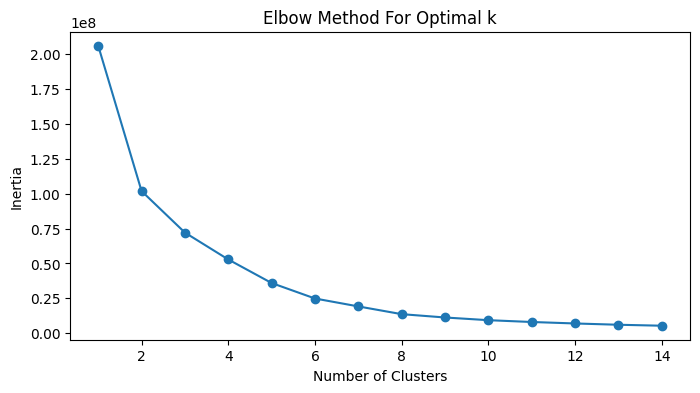

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1, len(inertias)+1), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
categorical_features = ['customer_category', 'State', 'Stock', 'product_group']
numerical_features = ['profit_margin']

# Define the preprocessing steps
preprocess = ColumnTransformer(
    [
        ('scaler', StandardScaler(), numerical_features),  # Scale numerical features
        ('encoder', OneHotEncoder(sparse_output=False), categorical_features)  # Encode categorical features
    ],
    remainder='drop'  # Drop all other features not specified in the transformer
)

# Fit the preprocessing pipeline on your data
# Note: You do not need to provide the features to cluster list here, the ColumnTransformer handles this
df_transformed = preprocess.fit_transform(bad_df)

# Perform the clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(df_transformed)

# Append the cluster labels to your original DataFrame without dropping any columns
bad_df['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
bad_df['Cluster'].value_counts()

Cluster
2    110858
0    100194
1       125
Name: count, dtype: int64

In [ ]:
bad_df.groupby('Cluster')['profit_margin'].mean().reset_index()

Cluster  profit_margin
0        0      24.327115
1        1    -890.853174
2        2      21.187694

In [ ]:
cluster_1 = bad_df[bad_df['Cluster']==1]

In [ ]:
cluster_1

customer_name customer_category  profit_margin  \
2385                       MAZAK CORPORATION            Better   -1148.672566   
3413    INACTIVE KIEWIT POWER CONST. WHS 152              Good    -734.615385   
3415    INACTIVE KIEWIT POWER CONST. WHS 152              Good    -734.615385   
7225                BEN HUR CONSTRUCTION CO.            Better    -513.580981   
7242                BEN HUR CONSTRUCTION CO.            Better    -513.580981   
...                                      ...               ...            ...   
348343           GEMMA POWER SYSTEMS WHS 170              Good    -907.692308   
348360           GEMMA POWER SYSTEMS WHS 170              Good    -908.974359   
348361           GEMMA POWER SYSTEMS WHS 170              Good    -908.974359   
348574           GEMMA POWER SYSTEMS WHS 170              Good    -908.974359   
348575           GEMMA POWER SYSTEMS WHS 170              Good   -1075.641026   

       State Stock product_class product_group  Cluster  
2385      KY     N        ELEBAT           ELE        1  
3413      IL     Y        ELEBAT           ELE        1  
3415      IL     Y        ELEBAT           ELE        1  
7225      OH     N        LIFPRT           LIF        1  
7242      OH     N        LIFPRT           LIF        1  
...      ...   ...           ...           ...      ...  
348343    OH     Y        CHECLE           CHE        1  
348360    OH     Y        CHECLE           CHE        1  
348361    OH     Y        CHECLE           CHE        1  
348574    OH     Y        CHECLE           CHE        1  
348575    OH     Y        CHECLE           CHE        1  

[125 rows x 8 columns]

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers in the ColumnTransformer"""
    output_features = []

    for name, estimator, features in column_transformer.transformers_:
        if name == 'remainder':
            if column_transformer.remainder == 'passthrough':
                # If 'remainder' is set to 'passthrough', get the remaining feature names that were not specified in transformers
                remainder_features = [f for f in column_transformer._feature_names_in if f not in output_features]
                output_features.extend(remainder_features)
            continue

        if hasattr(estimator, 'get_feature_names_out'):
            if isinstance(features, list) and all(isinstance(f, str) for f in features):
                # If the column transformer was given a list of feature names
                feature_names = estimator.get_feature_names_out(features)
            else:
                # If the column transformer was given an integer column index or a slice
                feature_names = estimator.get_feature_names_out()
            feature_names = [f"{name}__{f}" for f in feature_names]
        else:
            feature_names = features

        output_features.extend(feature_names)

    return output_features


In [ ]:
feature_names = get_feature_names(preprocess)

# Check if the number of feature names matches the number of columns in cluster_centers_
assert len(feature_names) == kmeans.cluster_centers_.shape[1], "Mismatch in the number of feature names and columns"

# Create a DataFrame for the centroids with the correct feature names
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print(centroids)

   scaler__profit_margin  encoder__customer_category_Average Cost  \
0               0.070204                                 0.000100   
1             -29.270400                                 0.016000   
2              -0.030446                                 0.057722   

   encoder__customer_category_Best  encoder__customer_category_Better  \
0                         0.000220                           0.999681   
1                         0.336000                           0.144000   
2                         0.212894                           0.000289   

   encoder__customer_category_Good  encoder__customer_category_List Price  \
0                    -1.502132e-13                           1.595403e-16   
1                     4.960000e-01                           8.000000e-03   
2                     7.288152e-01                           2.796370e-04   

   encoder__State_AK  encoder__State_AL  encoder__State_AR  encoder__State_AZ  \
0       4.985636e-18           0.005380 

In [ ]:
# Calculate the standard deviation of each feature across centroids
feature_std = centroids.std()

# Sort features by descending order of standard deviation
important_features = feature_std.sort_values(ascending=False)

# Print the sorted features to identify the most variable ones, thus most important
print("Features ranked by their importance in clustering:")
print(important_features)

Features ranked by their importance in clustering:
scaler__profit_margin                16.910825
encoder__customer_category_Better     0.540313
encoder__State_LA                     0.373284
encoder__customer_category_Good       0.372243
encoder__State_OH                     0.348372
                                       ...    
encoder__State_OR                     0.000021
encoder__State_MT                     0.000016
encoder__State_VT                     0.000016
encoder__State_AK                     0.000005
encoder__State_DE                     0.000005
Length: 72, dtype: float64


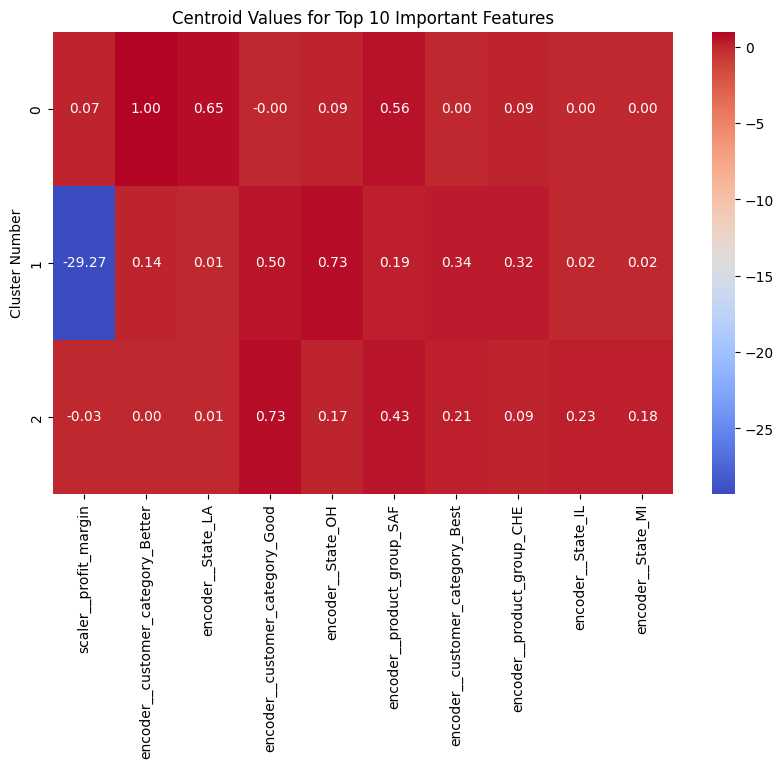

In [ ]:

top_features = important_features.head(10).index

# Plotting the centroids for the top N important features
plt.figure(figsize=(10, 6))
sns.heatmap(centroids[top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Centroid Values for Top 10 Important Features')
plt.ylabel('Cluster Number')
plt.show()

In [ ]:
categorical_features = ['customer_category', 'State', 'Stock', 'product_group']

# Define the preprocessing steps
preprocess = ColumnTransformer(
    [
        ('encoder', OneHotEncoder(sparse_output=False), categorical_features)  # Encode categorical features
    ],
    remainder='drop'  # Drop all other features not specified in the transformer
)

df_transformed = preprocess.fit_transform(cluster_1)

# Perform the clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(df_transformed)

cluster_1['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-86a2cb9742ca>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['Cluster'] = cluster_labels


In [ ]:
cluster_1[cluster_1['Cluster']==0]

customer_name customer_category  profit_margin  \
86390        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86391        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86392        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86394        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86396        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86406        UNITED GROUP SERVICES WHSE 502              Best    -497.922849   
86407        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86408        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86411        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86412        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86414        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86421        UNITED GROUP SERVICES WHSE 502              Best    -606.231454   
86423        UNITED GROUP SERVICES WHSE 502              Best    -497.922849   
86424        UNITED GROUP SERVICES WHSE 502              Best    -497.922849   
89492        UNITED GROUP SERVICES WHSE 502              Best    -614.836795   
89494        UNITED GROUP SERVICES WHSE 502              Best    -614.836795   
89495        UNITED GROUP SERVICES WHSE 502              Best    -614.836795   
89498        UNITED GROUP SERVICES WHSE 502              Best    -497.922849   
97777        UNITED GROUP SERVICES WHSE 502              Best   -1050.149254   
97778        UNITED GROUP SERVICES WHSE 502              Best   -1050.149254   
98002        UNITED GROUP SERVICES WHSE 502              Best    -748.059701   
98003        UNITED GROUP SERVICES WHSE 502              Best    -761.492537   
98004        UNITED GROUP SERVICES WHSE 502              Best    -834.328358   
98005        UNITED GROUP SERVICES WHSE 502              Best    -747.761194   
98006        UNITED GROUP SERVICES WHSE 502              Best    -747.761194   
98007        UNITED GROUP SERVICES WHSE 502              Best    -814.029851   
98008        UNITED GROUP SERVICES WHSE 502              Best    -870.149254   
98009        UNITED GROUP SERVICES WHSE 502              Best    -834.328358   
98483        UNITED GROUP SERVICES WHSE 502              Best    -563.582090   
98484        UNITED GROUP SERVICES WHSE 502              Best    -563.582090   
98488        UNITED GROUP SERVICES WHSE 502              Best    -452.537313   
98489        UNITED GROUP SERVICES WHSE 502              Best    -452.537313   
98490        UNITED GROUP SERVICES WHSE 502              Best    -631.343284   
98491        UNITED GROUP SERVICES WHSE 502              Best    -631.343284   
98496        UNITED GROUP SERVICES WHSE 502              Best    -631.343284   
98497        UNITED GROUP SERVICES WHSE 502              Best    -631.343284   
98499        UNITED GROUP SERVICES WHSE 502              Best    -761.492537   
101598       UNITED GROUP SERVICES WHSE 502              Best   -1170.149254   
290922  ACCURITY INDUSTRIAL CONTRACTORS INC              Best    -513.654618   

       State Stock product_class product_group  Cluster  
86390     OH     Y        TIGTUN           TIG        0  
86391     OH     Y        TIGTUN           TIG        0  
86392     OH     Y        TIGTUN           TIG        0  
86394     OH     Y        TIGTUN           TIG        0  
86396     OH     Y        TIGTUN           TIG        0  
86406     OH     Y        TIGTUN           TIG        0  
86407     OH     Y        TIGTUN           TIG        0  
86408     OH     Y        TIGTUN           TIG        0  
86411     OH     Y        TIGTUN           TIG        0  
86412     OH     Y        TIGTUN           TIG        0  
86414     OH     Y        TIGTUN           TIG        0  
86421     OH     Y        TIGTUN           TIG        0  
86423     OH     Y        TIGTUN           TIG        0  
86424     OH     

In [ ]:
cluster_1[cluster_1['Cluster']==1]

customer_name customer_category  \
3413            INACTIVE KIEWIT POWER CONST. WHS 152              Good   
3415            INACTIVE KIEWIT POWER CONST. WHS 152              Good   
11199                                 WERNKE WELDING              Good   
31406   INACTIVE Kiewit - Niles Energy Center OSS161              Good   
71327                    GEMMA POWER SYSTEMS WHS 170              Good   
74704          inactive UNITED GROUP SERVICES OSS158              Good   
128815            CASEY INDUSTRIAL WHSE 177 - CLOSED              Good   
129138            CASEY INDUSTRIAL WHSE 177 - CLOSED              Good   
139874                   GEMMA POWER SYSTEMS WHS 170              Good   
139875                   GEMMA POWER SYSTEMS WHS 170              Good   
139876                   GEMMA POWER SYSTEMS WHS 170              Good   
260092                                       TIC 171              Good   
346061                   GEMMA POWER SYSTEMS WHS 170              Good   
346062                   GEMMA POWER SYSTEMS WHS 170              Good   
346063                   GEMMA POWER SYSTEMS WHS 170              Good   
346073                 INACTIVE KIEWIT POWER WHS 146              Good   
346170                   GEMMA POWER SYSTEMS WHS 170              Good   
346183                   GEMMA POWER SYSTEMS WHS 170              Good   
346184                   GEMMA POWER SYSTEMS WHS 170              Good   
346185                   GEMMA POWER SYSTEMS WHS 170              Good   
346319                   GEMMA POWER SYSTEMS WHS 170              Good   
346320                   GEMMA POWER SYSTEMS WHS 170              Good   
346321                   GEMMA POWER SYSTEMS WHS 170              Good   
346349                   GEMMA POWER SYSTEMS WHS 170              Good   
346350                   GEMMA POWER SYSTEMS WHS 170              Good   
346471                   GEMMA POWER SYSTEMS WHS 170              Good   
346472                   GEMMA POWER SYSTEMS WHS 170              Good   
346524                   GEMMA POWER SYSTEMS WHS 170              Good   
346525                   GEMMA POWER SYSTEMS WHS 170              Good   
346663                   GEMMA POWER SYSTEMS WHS 170              Good   
348045                   GEMMA POWER SYSTEMS WHS 170              Good   
348103                   GEMMA POWER SYSTEMS WHS 170              Good   
348125                   GEMMA POWER SYSTEMS WHS 170              Good   
348189                   GEMMA POWER SYSTEMS WHS 170              Good   
348190                   GEMMA POWER SYSTEMS WHS 170              Good   
348207                   GEMMA POWER SYSTEMS WHS 170              Good   
348208                   GEMMA POWER SYSTEMS WHS 170              Good   
348343                   GEMMA POWER SYSTEMS WHS 170              Good   
348360                   GEMMA POWER SYSTEMS WHS 170              Good   
348361                   GEMMA POWER SYSTEMS WHS 170              Good   
348574                   GEMMA POWER SYSTEMS WHS 170              Good   
348575                   GEMMA POWER SYSTEMS WHS 170              Good   

        profit_margin State Stock product_class product_group  Cluster  
3413      -734.615385    IL     Y        ELEBAT           ELE        1  
3415      -734.615385    IL     Y        ELEBAT           ELE        1  
11199     -613.559322    OH     Y        APPPRT           APP        1  
31406    -1418.644068    MI     Y        SAFETY           SAF        1  
71327     -509.859155    OH     Y        SAFETY           SAF        1  
74704     -468.000000    LA     Y        CHEMIS           CHE        1  
128815   -1935.365854    AL     Y        CHELUB           CHE        1  
129138   -1935.365854    AL     Y        CHELUB           CHE        1  
139874   -1952.500000    OH     Y        SAFTAG           SAF        1  
139875   -1952.500000    OH     Y        SAFTAG           SAF        1  
139876   -1952.500000    OH     Y        SAFTAG      

In [ ]:
cluster_1[cluster_1['Cluster']==2]

customer_name customer_category  \
2385                        MAZAK CORPORATION            Better   
7225                 BEN HUR CONSTRUCTION CO.            Better   
7242                 BEN HUR CONSTRUCTION CO.            Better   
9221              ELECTRIC MOTOR TECHNOLOGIES              Good   
9225              ELECTRIC MOTOR TECHNOLOGIES              Good   
9226              ELECTRIC MOTOR TECHNOLOGIES              Good   
9249              ELECTRIC MOTOR TECHNOLOGIES              Good   
10592   MINERA PANAMA, S. A. - IN COLLECTIONS              Good   
27793              DUKE ENERGY PROGRESS, LLC.            Better   
39280              DUKE ENERGY PROGRESS, LLC.            Better   
48800               DUKE ENERGY INDIANA, INC.            Better   
53167                GEMMA POWER SYSTEMS, LLC              Good   
61434            DUKE ENERGY CAROLINA NUCLEAR            Better   
69481                    AMHERST MADISON INC.              Good   
69482                    AMHERST MADISON INC.              Good   
74173                       AMECO IC - VISTRA      Average Cost   
86722                                 METALEX              Good   
89507                                 METALEX              Good   
89508                                 METALEX              Good   
89509                                 METALEX              Good   
109297                                AUCTION        List Price   
111767                        GAVIN POWER LLC              Good   
140178             KALTEK INTERNATIONAL, LLC.            Better   
140857           DZ ATLANTIC ACCOUNTS PAYABLE            Better   
140929                               AMECO IC      Average Cost   
159282            KIEWIT POWER (WHSE Primary)              Best   
159704                       TEI CONSTRUCTION              Best   
159730            Weiss Technik North America            Better   
170598                WOOD-MIZER LLC WHSE 500            Better   
170968                WOOD-MIZER LLC WHSE 500            Better   
171545            PATRIOT MANUFACTURING GROUP              Good   
173915                PERFORMANCE CONTRACTORS            Better   
178134             GRAYWOLF INTEGRATED CONST.              Good   
178230                    WATERFORD POWER LLC              Good   
187492            Weiss Technik North America            Better   
189010                           RANGER STEEL            Better   
202603            NATIONAL WELDING & ASSEMBLY              Good   
203888                PERFORMANCE CONTRACTORS            Better   
207287                PERFORMANCE CONTRACTORS            Better   
233054  MINERA PANAMA, S. A. - IN COLLECTIONS              Good   
233589                          TOTAL WESTERN              Best   
237413           DUKE ENERGY CAROLINA NUCLEAR            Better   
280357                     SUNDT CONSTRUCTION              Good   
284947  MINERA PANAMA, S. A. - IN COLLECTIONS              Good   

        profit_margin State Stock product_class product_group  Cluster  
2385     -1148.672566    KY     N        ELEBAT           ELE        2  
7225      -513.580981    OH     N        LIFPRT           LIF        2  
7242      -513.580981    OH     N        LIFPRT           LIF        2  
9221      -495.981630    OH     N        LIFPRT           LIF        2  
9225      -597.200000    OH     N        LIFPRT           LIF        2  
9226     -1149.591281    OH     N        LIFPRT           LIF        2  
9249      -596.800000    OH     N        LIFPRT           LIF        2  
10592     -566.906475    FL     N        APPPRT           APP        2  
27793     -686.415094    NC     N        SAFETY           SAF        2  
39280     -710.126582    NC     N        SAFETY           SAF        2  
48800    -2058.535785    IN     N        SAFETY           SAF        2  
53167     -571.830986    OH     N        SAFETY           SAF        2  
61434     -710.191083    NC     N        SAFETY           SAF      

In [ ]:
cluster_1.to_csv('/content/drive/MyDrive/Capstone Data/extreme_bad.csv')

In [ ]:
feature_names = get_feature_names(preprocess)

# Check if the number of feature names matches the number of columns in cluster_centers_
assert len(feature_names) == kmeans.cluster_centers_.shape[1], "Mismatch in the number of feature names and columns"

# Create a DataFrame for the centroids with the correct feature names
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print(centroids)

   encoder__customer_category_Average Cost  encoder__customer_category_Best  \
0                            -1.040834e-17                     1.000000e+00   
1                            -1.040834e-17                    -1.110223e-16   
2                             4.545455e-02                     6.818182e-02   

   encoder__customer_category_Better  encoder__customer_category_Good  \
0                      -5.551115e-17                         0.000000   
1                      -5.551115e-17                         1.000000   
2                       4.090909e-01                         0.454545   

   encoder__customer_category_List Price  encoder__State_AL  \
0                          -5.204170e-18      -1.040834e-17   
1                          -5.204170e-18       4.761905e-02   
2                           2.272727e-02      -1.040834e-17   

   encoder__State_AZ  encoder__State_FL  encoder__State_GA  encoder__State_IL  \
0      -5.204170e-18           0.025641      -5.204170e-

Features ranked by their importance in clustering:
encoder__customer_category_Best            0.558709
encoder__Stock_Y                           0.551107
encoder__Stock_N                           0.551107
encoder__customer_category_Good            0.500688
encoder__product_group_CHE                 0.415394
encoder__product_group_MAI                 0.296077
encoder__State_OH                          0.278143
encoder__product_group_TIG                 0.244489
encoder__customer_category_Better          0.236189
encoder__product_group_SAF                 0.207623
encoder__State_IN                          0.091851
encoder__product_group_LIF                 0.078730
encoder__product_group_HAN                 0.065608
encoder__State_KY                          0.039365
encoder__State_NC                          0.039365
encoder__State_AL                          0.027493
encoder__State_MI                          0.027493
encoder__product_group_CUT                 0.026243
encoder__cust

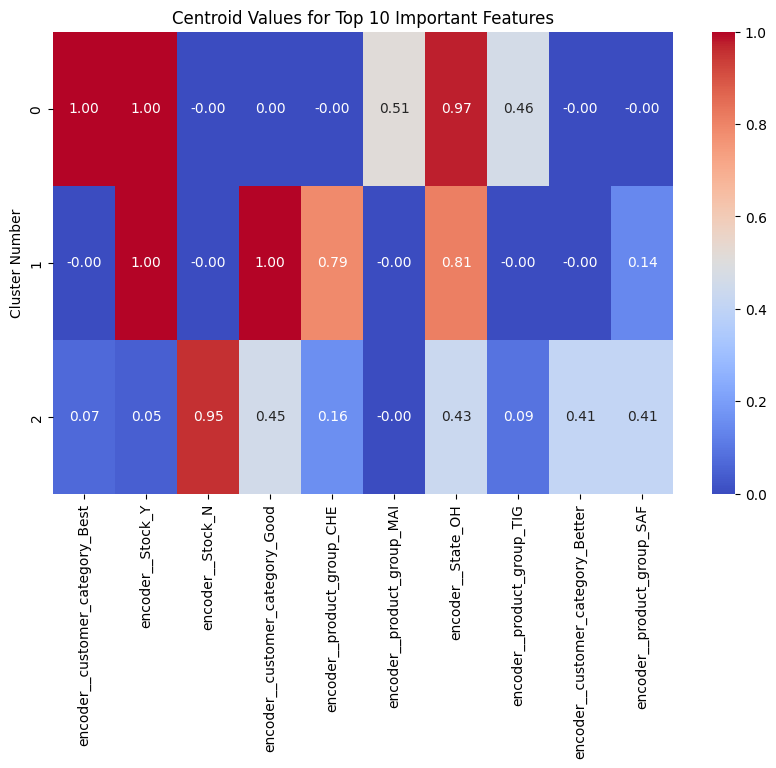

In [ ]:
# Calculate the standard deviation of each feature across centroids
feature_std = centroids.std()

# Sort features by descending order of standard deviation
important_features = feature_std.sort_values(ascending=False)

# Print the sorted features to identify the most variable ones, thus most important
print("Features ranked by their importance in clustering:")
print(important_features)
top_features = important_features.head(10).index

# Plotting the centroids for the top N important features
plt.figure(figsize=(10, 6))
sns.heatmap(centroids[top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Centroid Values for Top 10 Important Features')
plt.ylabel('Cluster Number')
plt.show()

#### Only with product group, state, stock

In [ ]:
bad_df = ds[ds['Product_Class'].isin(bad_product_list )]
bad_df = bad_df.merge(products,how='inner',left_on='Product_Class',right_on='Product Class')
bad_df = bad_df[['customer_category','Profit_Margin','State','Stock','Product Group']]
bad_df = bad_df.rename({'Product Group':'product_group'},axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

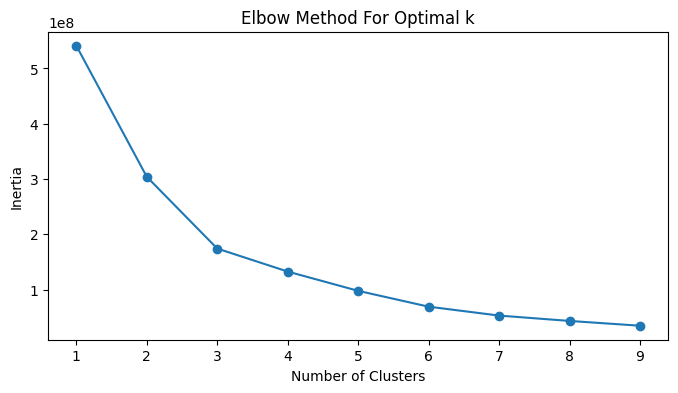

In [ ]:
features = ['customer_category', 'Profit_Margin', 'State', 'Stock', 'product_group']
X = pd.get_dummies(bad_df[features])

inertias = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
cluster_df = bad_df

preprocess = ColumnTransformer(
    [
        ('scaler', StandardScaler(), ['Profit_Margin']),  # Scale numeric features
        ('encoder', OneHotEncoder(sparse_output=False), ['customer_category', 'State', 'Stock','product_group'])  # Encode categorical features
    ],
    remainder='passthrough'  # Pass through other features
)

# Fit the preprocessing pipeline on your data
df_transformed = preprocess.fit_transform(cluster_df)

# Clustering
kmeans = KMeans(n_clusters=3,random_state=0)
cluster_df['Cluster'] = kmeans.fit_predict(df_transformed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_df.groupby('Cluster')['Profit_Margin'].mean().reset_index()

Cluster  Profit_Margin
0        0      25.405052
1        1      21.640036
2        2   -2616.872764

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers in the ColumnTransformer"""
    output_features = []

    for name, estimator, features in column_transformer.transformers_:
        if hasattr(estimator, 'get_feature_names_out'):
            if isinstance(features, list):
                feature_names = estimator.get_feature_names_out(features)
            else:
                feature_names = estimator.get_feature_names_out()
        else:
            feature_names = features
        output_features.extend(feature_names)

    return output_features

feature_names = get_feature_names(preprocess)

# Create a DataFrame for the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
print(centroids)

   Profit_Margin  customer_category_Average Cost  customer_category_Best  \
0       0.059695                        0.000146                0.000197   
1      -0.040335                        0.048766                0.239261   
2     -70.140947                        0.029412                0.352941   

   customer_category_Better  customer_category_Good  \
0                  0.999656            2.302603e-13   
1                  0.000241            7.113494e-01   
2                  0.117647            4.705882e-01   

   customer_category_List Price      State_AK  State_AL      State_AR  \
0                 -1.817936e-16 -4.820041e-18  0.005537  1.115355e-03   
1                  3.830928e-04  4.911447e-06  0.033398  9.046885e-03   
2                  2.941176e-02  0.000000e+00  0.058824 -1.734723e-18   

   State_AZ  ...  product_group_LIF  product_group_MAI  product_group_MAT  \
0  0.002118  ...       5.435946e-03           0.047470      -9.640082e-18   
1  0.005894  ...       1.09

In [ ]:
# Calculate the standard deviation of each feature across centroids
feature_std = centroids.std()

# Sort features by descending order of standard deviation
important_features = feature_std.sort_values(ascending=False)

# Print the sorted features to identify the most variable ones, thus most important
print("Features ranked by their importance in clustering:")
print(important_features)

Features ranked by their importance in clustering:
Profit_Margin               40.501514
customer_category_Better     0.546284
customer_category_Good       0.361810
State_LA                     0.350527
Stock_N                      0.322293
                              ...    
State_VT                     0.000009
product_group_MAT            0.000006
State_DC                     0.000003
State_DE                     0.000003
State_AK                     0.000003
Length: 86, dtype: float64


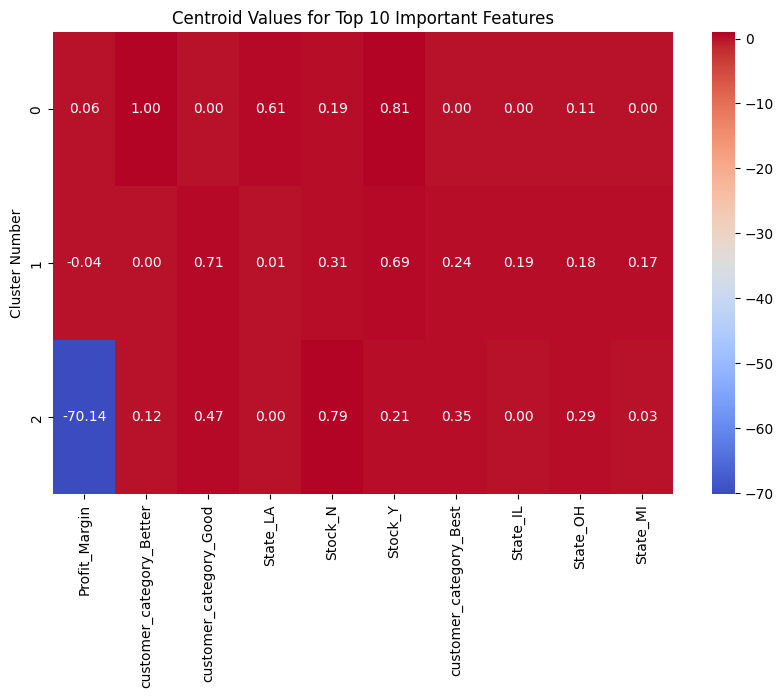

In [ ]:
top_features = important_features.head(10).index

# Plotting the centroids for the top N important features
plt.figure(figsize=(10, 6))
sns.heatmap(centroids[top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Centroid Values for Top 10 Important Features')
plt.ylabel('Cluster Number')
plt.show()

<Axes: xlabel='product_group', ylabel='Profit_Margin'>

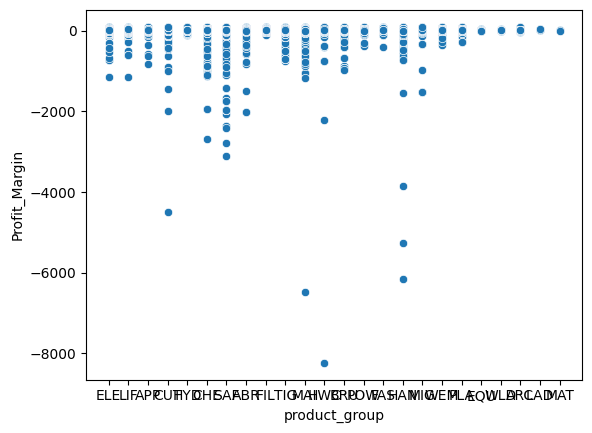

In [ ]:
sns.scatterplot(data=cluster_df, x="product_group", y="Profit_Margin")

### Reading the outlier product goods from the original dataset

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Capstone Data/pm_dataset.csv')

In [ ]:
ds

customer_name customer_category    Own  Year  Month  \
0                   MAZAK CORPORATION            Better  False  2020      1   
1       O'ROURKE CONSTRUCTION COMPANY              Good  False  2020      1   
2           ADVANCED DRAINAGE SYSTEMS              Good  False  2020      1   
3           ADVANCED DRAINAGE SYSTEMS              Good  False  2020      1   
4           ADVANCED DRAINAGE SYSTEMS              Good  False  2020      1   
...                               ...               ...    ...   ...    ...   
568076     ADS MANUFACTURING OHIO LLC            Better  False  2021      6   
568077     ADS MANUFACTURING OHIO LLC            Better  False  2021      6   
568078     ADS MANUFACTURING OHIO LLC            Better  False  2021      6   
568079     ADS MANUFACTURING OHIO LLC            Better  False  2021      6   
568080     ADS MANUFACTURING OHIO LLC            Better  False  2021      6   

       Quarter Prev_Quarter        Date                 Group Product_Class  \
0       2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD        ELEBAT   
1       2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD        LIFPRT   
2       2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD        APPPRT   
3       2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD        APPPRT   
4       2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD        APPPRT   
...        ...          ...         ...                   ...           ...   
568076  2021Q2       2020Q2  2021-06-16  Const Supplies CS/SD        SAFGLO   
568077  2021Q2       2020Q2  2021-06-16   Welding Equip WS/SD        MIGPAR   
568078  2021Q2       2020Q2  2021-06-16  Const Supplies CS/SD        SAFCOV   
568079  2021Q2       2020Q2  2021-06-16   Welding Equip WS/SD        APPPRT   
568080  2021Q2       2020Q2  2021-06-16  Const Supplies CS/SD        SAFGLO   

         Unit  Quantity    Cost  Price State Stock  Profit_Margin  
0          EA     400.0   0.638   0.85   NaN     Y      24.941176  
1          EA       2.0  16.528  18.71   NaN     Y      11.662213  
2          EA       1.0  20.210  32.08   NaN     Y      37.001247  
3          EA       1.0  20.410  29.15   NaN     N      29.982847  
4          EA       1.0   5.780   8.26   NaN     N      30.024213  
...       ...       ...     ...    ...   ...   ...            ...  
568076  PKG12       1.0   7.680  10.98    OH     N      30.054645  
568077     EA       2.0  34.520  49.32    OH     N      30.008110  
568078     EA      25.0   2.890   3.40    OH     N      15.000000  
568079     EA      10.0   1.600   2.10    OH     N      23.809524  
568080  PKG12       2.0   7.680  10.98    OH     N      30.054645  

[568081 rows x 17 columns]

#### Bad Products

In [ ]:
bad_df = ds[ds['Product_Class'].isin(bad_product_set)]
# good_df = good_df.groupby(['Group',	'Product_Class',])['Profit_Margin'].mean().reset_index()

In [ ]:
bad_df

customer_name customer_category    Own  Year  \
0                          MAZAK CORPORATION            Better  False  2020   
20                                 GEILER CO              Good  False  2020   
28                            WOOD-MIZER LLC              Good  False  2020   
29                            WOOD-MIZER LLC              Good  False  2020   
33                            WOOD-MIZER LLC              Good  False  2020   
...                                      ...               ...    ...   ...   
568041  INACTIVE KIEWIT POWER CONST. WHS 152              Good  False  2021   
568061                  DUKE ENERGY/KENTUCKY              Good  False  2021   
568062            ADS MANUFACTURING OHIO LLC            Better  False  2021   
568068            ADS MANUFACTURING OHIO LLC            Better  False  2021   
568074            ADS MANUFACTURING OHIO LLC            Better  False  2021   

        Month Quarter Prev_Quarter        Date                 Group  \
0           1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
20          1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
28          1  2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD   
29          1  2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD   
33          1  2020Q1       2019Q1  2020-01-01   Welding Equip WS/SD   
...       ...     ...          ...         ...                   ...   
568041      6  2021Q2       2020Q2  2021-06-15   Welding Equip WS/SD   
568061      6  2021Q2       2020Q2  2021-06-16   Welding Equip WS/SD   
568062      6  2021Q2       2020Q2  2021-06-16   Welding Equip WS/SD   
568068      6  2021Q2       2020Q2  2021-06-16  Const Supplies CS/SD   
568074      6  2021Q2       2020Q2  2021-06-16   Welding Equip WS/SD   

       Product_Class Unit  Quantity    Cost  Price State Stock  Profit_Margin  
0             ELEBAT   EA     400.0   0.638   0.85   NaN     Y      24.941176  
20            CHEMIS  CAN      48.0   4.976   6.94   NaN     Y      28.299712  
28            MIGTIP   EA     100.0   0.563   0.69   NaN     Y      18.405797  
29            MIGNOZ   EA      40.0   6.876   8.35   NaN     Y      17.652695  
33            FILCLA  LBS    1000.0   2.187   1.88   NaN     Y     -16.329787  
...              ...  ...       ...     ...    ...   ...   ...            ...  
568041        WEMWLG   EA       1.0  34.580  36.33    IL     Y       4.816956  
568061        SAFJAC   EA       2.0  11.620  15.36    KY     N      24.348958  
568062        SAFACC   EA      12.0   6.130   8.76    OH     N      30.022831  
568068        SAFCAP   EA      40.0   1.660   2.67    OH     N      37.827715  
568074        SAFLEN   EA      10.0   2.090   2.84    OH     N      26.408451  

[57220 rows x 17 columns]

In [ ]:
bad_product_set

{'ABRBEN',
 'ABRCUP',
 'ABRSAN',
 'APPREG',
 'ARCPRT',
 'BRUHAN',
 'BRUMIS',
 'CHECOO',
 'CHEMIS',
 'CHETEM',
 'CUTMIS',
 'CUTPUN',
 'ELEBAT',
 'ELEMIS',
 'EQULIG',
 'FILCLA',
 'FILELC',
 'FILSSO',
 'HANCEM',
 'HANMIC',
 'HANPLU',
 'HWCCAB',
 'HWCMIS',
 'HWCPOW',
 'HWCREL',
 'HWCTOO',
 'HWCWEL',
 'HYDPAR',
 'MAIBOX',
 'MAIMIS',
 'MAIRAG',
 'MATCAN',
 'MATFUR',
 'MATHAN',
 'MIGACC',
 'MIGNOZ',
 'MIGTIP',
 'PLAACC',
 'PLAMIS',
 'SAFACC',
 'SAFBOO',
 'SAFCAP',
 'SAFCUR',
 'SAFJAC',
 'SAFLEN',
 'SAFMAT',
 'WEMCAB',
 'WEMCHI',
 'WEMWLG',
 'WLDPAR'}

#### Examine one product - HANPUL

In [ ]:
han_df = bad_df[bad_df['Product_Class']=='HANPLU']

In [ ]:
to_merge_df = tg_pm_df[tg_pm_df['Product Class']=='HANPLU']

In [ ]:
han_df = han_df.merge(to_merge_df,left_on=['Product_Class'],right_on=['Product Class'])

In [ ]:
han_df['Year-Month'] = pd.to_datetime((han_df['Year'].astype(str) + '-' + han_df['Month'].astype(str)), format='%Y-%m')

In [ ]:
han_df['Differences']=han_df['Profit_Margin']-han_df['Values'].str.strip('%').astype(float)

In [ ]:
han_df

customer_name customer_category    Own  \
0          INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
1          INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
2          INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
3     TIC - VENTURE GLOBAL-STRIKEFORCE - CLOSED            Better  False   
4     TIC - VENTURE GLOBAL-STRIKEFORCE - CLOSED            Better  False   
...                                         ...               ...    ...   
1684       INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
1685       INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
1686       INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
1687       INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   
1688       INACTIVE KIEWIT POWER CONST. WHS 152              Good  False   

      Year  Month Quarter Prev_Quarter        Date                 Group  \
0     2020      1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
1     2020      1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
2     2020      1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
3     2020      1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
4     2020      1  2020Q1       2019Q1  2020-01-01  Const Supplies CS/SD   
...    ...    ...     ...          ...         ...                   ...   
1684  2021      6  2021Q2       2020Q2  2021-06-15  Const Supplies CS/SD   
1685  2021      6  2021Q2       2020Q2  2021-06-15  Const Supplies CS/SD   
1686  2021      6  2021Q2       2020Q2  2021-06-15  Const Supplies CS/SD   
1687  2021      6  2021Q2       2020Q2  2021-06-15  Const Supplies CS/SD   
1688  2021      6  2021Q2       2020Q2  2021-06-15  Const Supplies CS/SD   

     Product_Class  ...   Cost  Price  State  Stock Profit_Margin  \
0           HANPLU  ...  0.861   0.77    NaN      Y    -11.818182   
1           HANPLU  ...  0.861   0.77    NaN      Y    -11.818182   
2           HANPLU  ...  0.861   0.77    NaN      Y    -11.818182   
3           HANPLU  ...  0.875   0.80    NaN      Y     -9.375000   
4           HANPLU  ...  0.875   0.80    NaN      Y     -9.375000   
...            ...  ...    ...    ...    ...    ...           ...   
1684        HANPLU  ...  3.100   4.26     IL      Y     27.230047   
1685        HANPLU  ...  3.100   4.26     IL      Y     27.230047   
1686        HANPLU  ...  0.880   0.77     IL      Y    -14.285714   
1687        HANPLU  ...  0.880   0.77     IL      Y    -14.285714   
1688        HANPLU  ...  0.880   0.77     IL      Y    -14.285714   

     Product Class  Category Values Year-Month Differences  
0           HANPLU      Good    32% 2020-01-01  -43.818182  
1           HANPLU    Better    29% 2020-01-01  -40.818182  
2           HANPLU      Best    28% 2020-01-01  -39.818182  
3           HANPLU      Good    32% 2020-01-01  -41.375000  
4           HANPLU    Better    29% 2020-01-01  -38.375000  
...            ...       ...    ...        ...         ...  
1684        HANPLU    Better    29% 2021-06-01   -1.769953  
1685        HANPLU      Best    28% 2021-06-01   -0.769953  
1686        HANPLU      Good    32% 2021-06-01  -46.285714  
1687        HANPLU    Better    29% 2021-06-01  -43.285714  
1688        HANPLU      Best    28% 2021-06-01  -42.285714  

[1689 rows x 22 columns]

In [ ]:
han_df=han_df[~han_df.isna()]

In [ ]:
han_df.info() ## category, name(43), state, stock

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_name      1689 non-null   object        
 1   customer_category  1689 non-null   object        
 2   Own                1689 non-null   bool          
 3   Year               1689 non-null   int64         
 4   Month              1689 non-null   int64         
 5   Quarter            1689 non-null   object        
 6   Prev_Quarter       1689 non-null   object        
 7   Date               1689 non-null   object        
 8   Group              1689 non-null   object        
 9   Product_Class      1689 non-null   object        
 10  Unit               1689 non-null   object        
 11  Quantity           1689 non-null   float64       
 12  Cost               1689 non-null   float64       
 13  Price              1689 non-null   float64       
 14  State   

In [ ]:
han_exclude_df=han_df[han_df['Own']==False]

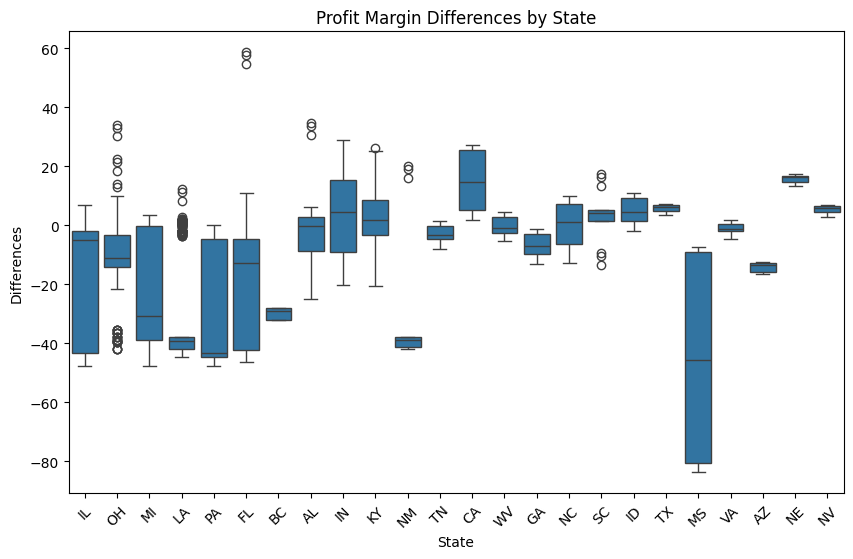

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=han_df['State'], y=han_df['Differences'], data=han_df)
plt.title('Profit Margin Differences by State')
plt.xticks(rotation=45)
plt.show()

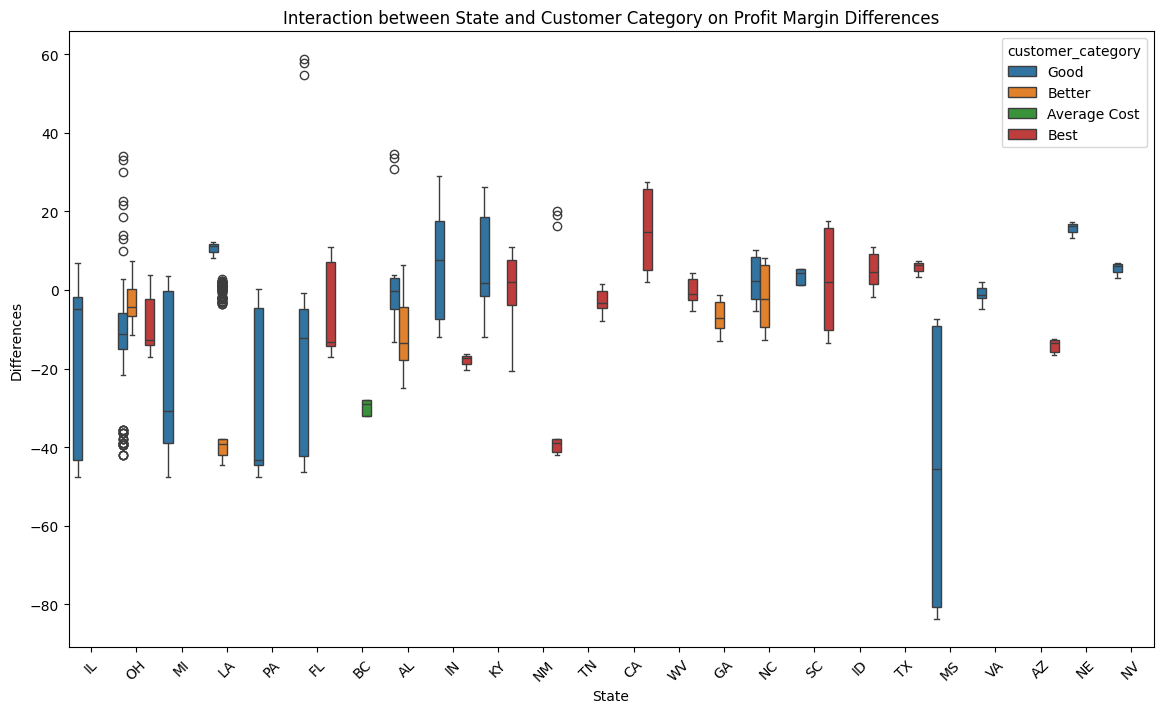

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=han_df['State'], y=han_df['Differences'], hue=han_df['customer_category'])
plt.title('Interaction between State and Customer Category on Profit Margin Differences')
plt.xticks(rotation=45)
plt.show()

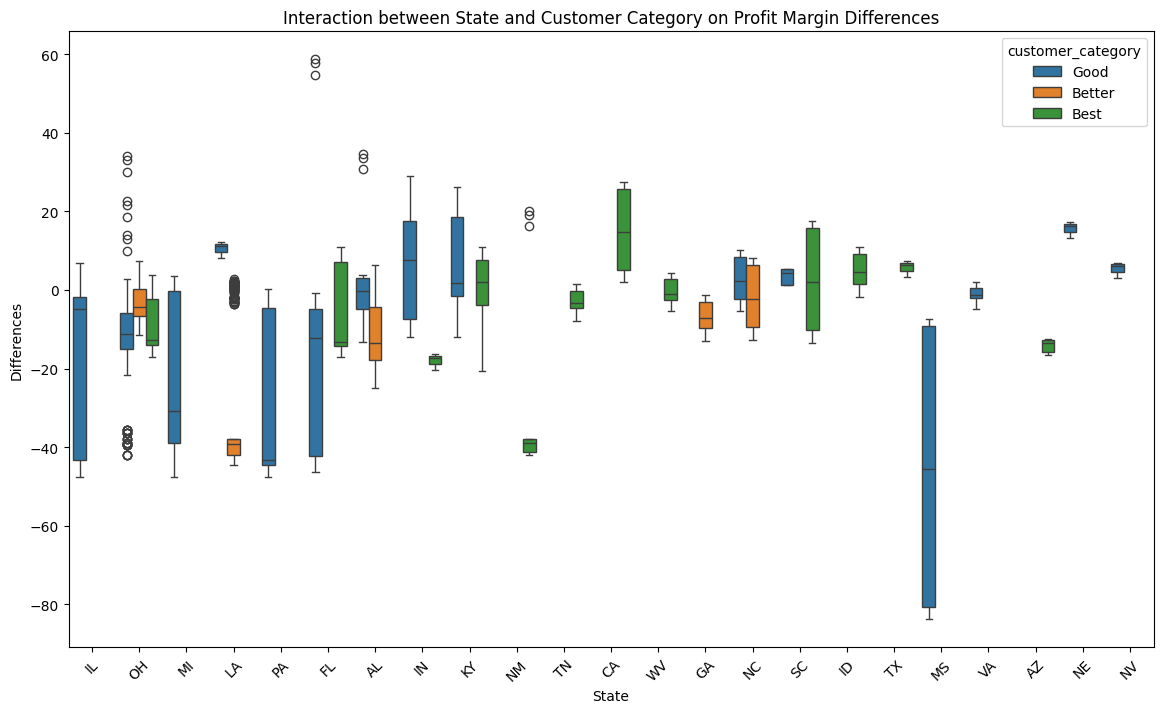

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=han_exclude_df['State'], y=han_exclude_df['Differences'], hue=han_exclude_df['customer_category'])
plt.title('Interaction between State and Customer Category on Profit Margin Differences')
plt.xticks(rotation=45)
plt.show()

##### try k-mean clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

cluster_df = han_df[['Profit_Margin','Category', 'State', 'Stock', 'customer_name']]

preprocess = ColumnTransformer(
    [
        ('scaler', StandardScaler(), ['Profit_Margin']),  # Scale numeric features
        ('encoder', OneHotEncoder(sparse_output=False), ['Category', 'State', 'Stock', 'customer_name'])  # Encode categorical features
    ],
    remainder='passthrough'  # Pass through other features
)

# Fit the preprocessing pipeline on your data
df_transformed = preprocess.fit_transform(cluster_df)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_df['Cluster'] = kmeans.fit_predict(df_transformed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-79-baf5d7f7469e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.fit_predict(df_transformed)


In [ ]:
cluster_df.groupby('Cluster')['Profit_Margin'].mean()

Cluster
0    27.417234
1   -10.589756
Name: Profit_Margin, dtype: float64

In [ ]:
cluster_df_0 = cluster_df[cluster_df['Cluster']==0]
cluster_df_1 = cluster_df[cluster_df['Cluster']==1]

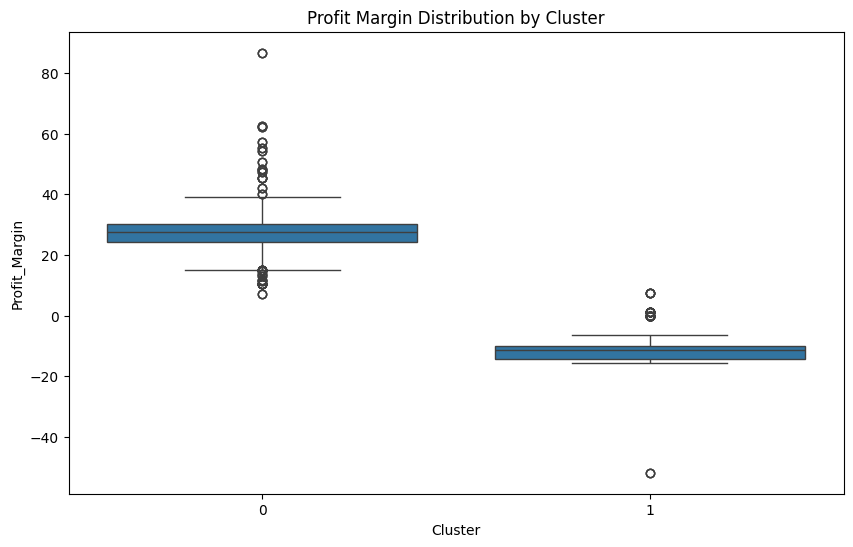

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Profit_Margin', data=cluster_df)
plt.title('Profit Margin Distribution by Cluster')
plt.show()

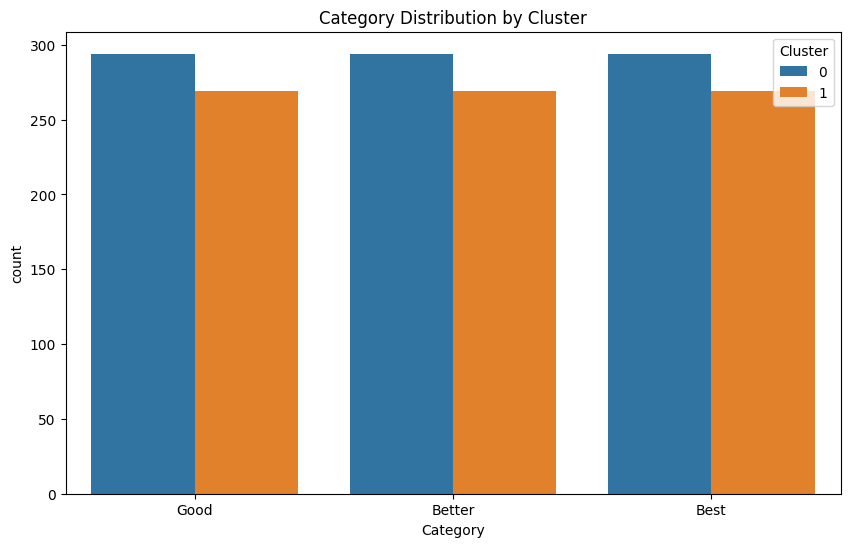

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Cluster', data=cluster_df)
plt.title('Category Distribution by Cluster')
plt.show()

In [ ]:
cluster_df_1.describe()

Profit_Margin  Cluster
count     807.000000    807.0
mean      -10.589756      1.0
std         4.888842      0.0
min       -51.785714      1.0
25%       -14.285714      1.0
50%       -11.250000      1.0
75%       -10.000000      1.0
max         7.500000      1.0

In [ ]:
state_profit = cluster_df_1.groupby('State')['Profit_Margin'].mean()
customer_profit = cluster_df_1.groupby('customer_name')['Profit_Margin'].mean()

#### Examine one product - HWCCAB

In [ ]:
hwc_df = bad_df[bad_df['Product_Class']=='HWCCAB']

In [ ]:
to_merge_df = tg_pm_df[tg_pm_df['Product Class']=='HWCCAB']

In [ ]:
hwc_df = hwc_df.merge(to_merge_df,left_on=['Product_Class'],right_on=['Product Class'])

In [ ]:
hwc_df['Year-Month'] = pd.to_datetime((hwc_df['Year'].astype(str) + '-' + hwc_df['Month'].astype(str)), format='%Y-%m')

In [ ]:
hwc_df['Differences']=hwc_df['Profit_Margin']-hwc_df['Values'].str.strip('%').astype(float)

In [ ]:
hwc_df

customer_name customer_category    Own  Year  Month Quarter  \
0        EBAY CASH SALES              Best  False  2021      6  2021Q2   
1        EBAY CASH SALES              Best  False  2021      6  2021Q2   
2        EBAY CASH SALES              Best  False  2021      6  2021Q2   
3    CREDIT CARD ACCOUNT              Good  False  2021      7  2021Q3   
4    CREDIT CARD ACCOUNT              Good  False  2021      7  2021Q3   
..                   ...               ...    ...   ...    ...     ...   
145     TEI CONSTRUCTION              Best  False  2021      3  2021Q1   
146     TEI CONSTRUCTION              Best  False  2021      3  2021Q1   
147     TEI CONSTRUCTION              Best  False  2021      3  2021Q1   
148     TEI CONSTRUCTION              Best  False  2021      3  2021Q1   
149     TEI CONSTRUCTION              Best  False  2021      3  2021Q1   

    Prev_Quarter        Date                Group Product_Class  ...    Cost  \
0         2020Q2  2021-06-22  Welding Equip WS/SD        HWCCAB  ...   44.75   
1         2020Q2  2021-06-22  Welding Equip WS/SD        HWCCAB  ...   44.75   
2         2020Q2  2021-06-22  Welding Equip WS/SD        HWCCAB  ...   44.75   
3         2020Q3  2021-07-07  Welding Equip WS/SD        HWCCAB  ...  359.36   
4         2020Q3  2021-07-07  Welding Equip WS/SD        HWCCAB  ...  359.36   
..           ...         ...                  ...           ...  ...     ...   
145       2020Q1  2021-03-23  Welding Equip WS/SD        HWCCAB  ...    1.72   
146       2020Q1  2021-03-23  Welding Equip WS/SD        HWCCAB  ...    1.72   
147       2020Q1  2021-03-23  Welding Equip WS/SD        HWCCAB  ...    1.72   
148       2020Q1  2021-03-23  Welding Equip WS/SD        HWCCAB  ...    1.72   
149       2020Q1  2021-03-23  Welding Equip WS/SD        HWCCAB  ...    1.72   

      Price  State  Stock Profit_Margin Product Class  Category Values  \
0     38.00     VA      N    -17.763158        HWCCAB      Good    32%   
1     38.00     VA      N    -17.763158        HWCCAB    Better    29%   
2     38.00     VA      N    -17.763158        HWCCAB      Best    28%   
3    468.75     NV      N     23.336533        HWCCAB      Good    32%   
4    468.75     NV      N     23.336533        HWCCAB    Better    29%   
..      ...    ...    ...           ...           ...       ...    ...   
145    2.03     WY      N     15.270936        HWCCAB    Better    29%   
146    2.03     WY      N     15.270936        HWCCAB      Best    28%   
147    2.03     WY      N     15.270936        HWCCAB      Good    32%   
148    2.03     WY      N     15.270936        HWCCAB    Better    29%   
149    2.03     WY      N     15.270936        HWCCAB      Best    28%   

    Year-Month Differences  
0   2021-06-01  -49.763158  
1   2021-06-01  -46.763158  
2   2021-06-01  -45.763158  
3   2021-07-01   -8.663467  
4   2021-07-01   -5.663467  
..         ...         ...  
145 2021-03-01  -13.729064  
146 2021-03-01  -12.729064  
147 2021-03-01  -16.729064  
148 2021-03-01  -13.729064  
149 2021-03-01  -12.729064  

[150 rows x 22 columns]

In [ ]:
hwc_df=hwc_df[~hwc_df.isna()]

In [ ]:
hwc_df.describe(include='all') ## category, name(43), state, stock

customer_name customer_category    Own         Year       Month  \
count               150               150    150   150.000000  150.000000   
unique               22                 3      1          NaN         NaN   
top     EBAY CASH SALES              Best  False          NaN         NaN   
freq                 21                60    150          NaN         NaN   
mean                NaN               NaN    NaN  2021.100000    7.220000   
min                 NaN               NaN    NaN  2020.000000    1.000000   
25%                 NaN               NaN    NaN  2020.000000    5.000000   
50%                 NaN               NaN    NaN  2021.000000    7.000000   
75%                 NaN               NaN    NaN  2022.000000   10.000000   
max                 NaN               NaN    NaN  2023.000000   12.000000   
std                 NaN               NaN    NaN     0.967596    3.280755   

       Quarter Prev_Quarter        Date                Group Product_Class  \
count      150          150         150                  150           150   
unique      14           11          42                    1             1   
top     2021Q3       2019Q1  2021-03-23  Welding Equip WS/SD        HWCCAB   
freq        21           48           9                  150           150   
mean       NaN          NaN         NaN                  NaN           NaN   
min        NaN          NaN         NaN                  NaN           NaN   
25%        NaN          NaN         NaN                  NaN           NaN   
50%        NaN          NaN         NaN                  NaN           NaN   
75%        NaN          NaN         NaN                  NaN           NaN   
max        NaN          NaN         NaN                  NaN           NaN   
std        NaN          NaN         NaN                  NaN           NaN   

        ...        Cost       Price  State  Stock Profit_Margin Product Class  \
count   ...  150.000000  150.000000    150    150    150.000000           150   
unique  ...         NaN         NaN     16      1           NaN             1   
top     ...         NaN         NaN     OH      N           NaN        HWCCAB   
freq    ...         NaN         NaN     33    150           NaN           150   
mean    ...   57.195800   76.478000    NaN    NaN    -20.983693           NaN   
min     ...    0.000000    0.650000    NaN    NaN  -2218.255250           NaN   
25%     ...   10.090000    6.190000    NaN    NaN     18.000000           NaN   
50%     ...   30.700000   37.945000    NaN    NaN     23.718626           NaN   
75%     ...   50.250000   66.000000    NaN    NaN     30.113636           NaN   
max     ...  474.160000  510.000000    NaN    NaN    100.000000           NaN   
std     ...   85.777669  115.903637    NaN    NaN    315.585754           NaN   

        Category Values           Year-Month  Differences  
count        150    150                  150   150.000000  
unique         3      3                  NaN          NaN  
top         Good    32%                  NaN          NaN  
freq          50     50                  NaN          NaN  
mean         NaN    NaN  2021-08-13 18:43:12   -50.650360  
min          NaN    NaN  2020-03-01 00:00:00 -2250.255250  
25%          NaN    NaN  2020-10-01 00:00:00   -12.936099  
50%          NaN    NaN  2021-08-16 12:00:00    -7.000000  
75%          NaN    NaN  2022-07-01 00:00:00     1.085399  
max          NaN    NaN  2023-06-01 00:00:00    72.000000  
std          NaN    NaN                  NaN   315.590361  

[11 rows x 22 columns]

In [ ]:
hwc_exclude_df=hwc_df[hwc_df['Profit_Margin']>-2000]

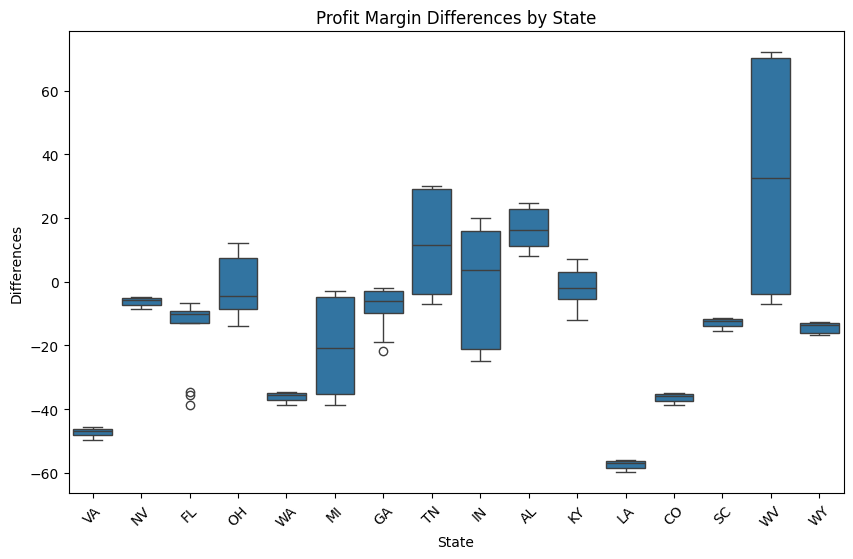

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=hwc_exclude_df['State'], y=hwc_exclude_df['Differences'], data=hwc_exclude_df)
plt.title('Profit Margin Differences by State')
plt.xticks(rotation=45)
plt.show()

In [ ]:
test = hwc_df[hwc_df['Profit_Margin']<-2000]

In [ ]:
test

customer_name customer_category    Own  Year  Month  \
42  COMPLETE MECHANICAL SERVICES            Better  False  2022      1   
43  COMPLETE MECHANICAL SERVICES            Better  False  2022      1   
44  COMPLETE MECHANICAL SERVICES            Better  False  2022      1   

   Quarter Prev_Quarter        Date                Group Product_Class  ...  \
42  2022Q1       2021Q1  2022-01-10  Welding Equip WS/SD        HWCCAB  ...   
43  2022Q1       2021Q1  2022-01-10  Welding Equip WS/SD        HWCCAB  ...   
44  2022Q1       2021Q1  2022-01-10  Welding Equip WS/SD        HWCCAB  ...   

     Cost  Price  State  Stock Profit_Margin Product Class  Category Values  \
42  143.5   6.19     OH      N   -2218.25525        HWCCAB      Good    32%   
43  143.5   6.19     OH      N   -2218.25525        HWCCAB    Better    29%   
44  143.5   6.19     OH      N   -2218.25525        HWCCAB      Best    28%   

   Year-Month Differences  
42 2022-01-01 -2250.25525  
43 2022-01-01 -2247.25525  
44 2022-01-01 -2246.25525  

[3 rows x 22 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Values').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Values')):
  _plot_series(series, series_name, i)
  fig.legend(title='Values', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Values')):
  _plot_series(series, series_name, i)
  fig.legend(title='Values', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Values'].value_counts()
    for x_label, grp in _df_8.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Values')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='index', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Values'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='Values', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

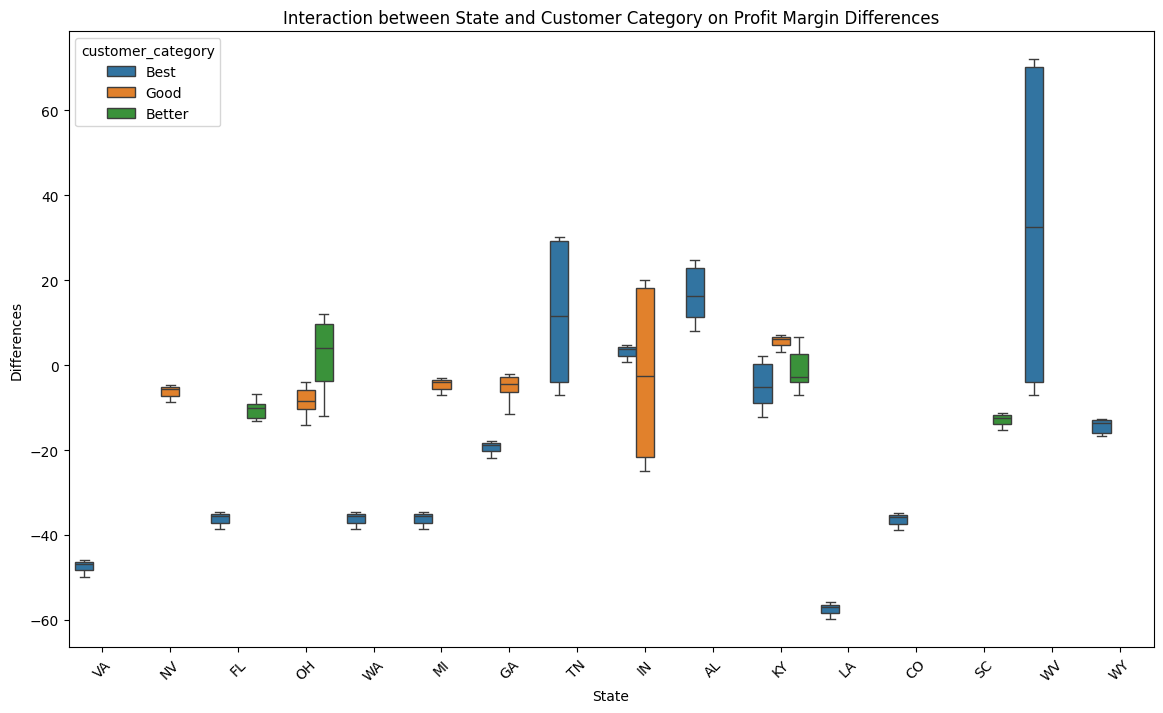

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=hwc_exclude_df['State'], y=hwc_exclude_df['Differences'], hue=hwc_exclude_df['customer_category'])
plt.title('Interaction between State and Customer Category on Profit Margin Differences')
plt.xticks(rotation=45)
plt.show()

##### try k-mean clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

cluster_df = hwc_exclude_df[['Profit_Margin','Category', 'State', 'Stock', 'customer_name']]

preprocess = ColumnTransformer(
    [
        ('scaler', StandardScaler(), ['Profit_Margin']),  # Scale numeric features
        ('encoder', OneHotEncoder(sparse_output=False), ['Category', 'State', 'Stock', 'customer_name'])  # Encode categorical features
    ],
    remainder='passthrough'  # Pass through other features
)

# Fit the preprocessing pipeline on your data
df_transformed = preprocess.fit_transform(cluster_df)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_df['Cluster'] = kmeans.fit_predict(df_transformed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-113-5e3293646fae>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.fit_predict(df_transformed)


In [ ]:
cluster_df.groupby('Cluster')['Profit_Margin'].mean()

Cluster
0    59.507630
1    -6.859492
2    24.768593
Name: Profit_Margin, dtype: float64

In [ ]:
cluster_df_0 = cluster_df[cluster_df['Cluster']==0]
cluster_df_1 = cluster_df[cluster_df['Cluster']==1]
cluster_df_2 = cluster_df[cluster_df['Cluster']==2]

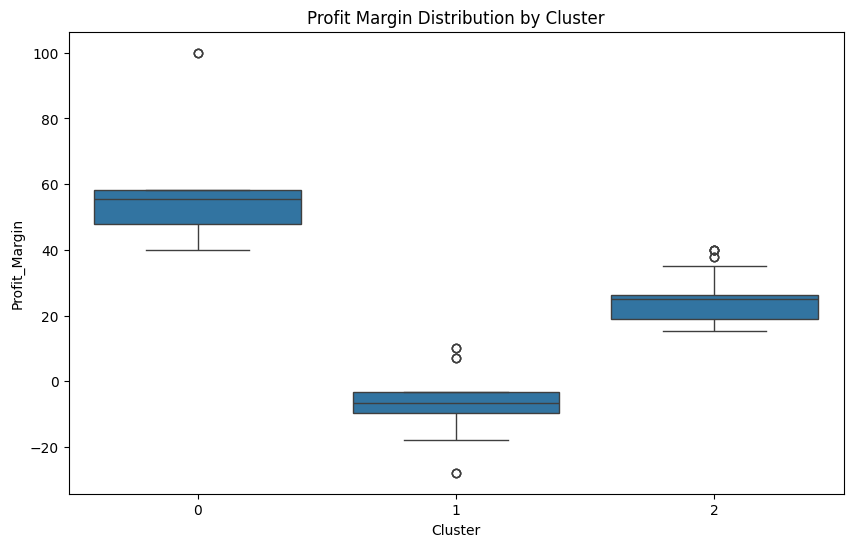

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Profit_Margin', data=cluster_df)
plt.title('Profit Margin Distribution by Cluster')
plt.show()

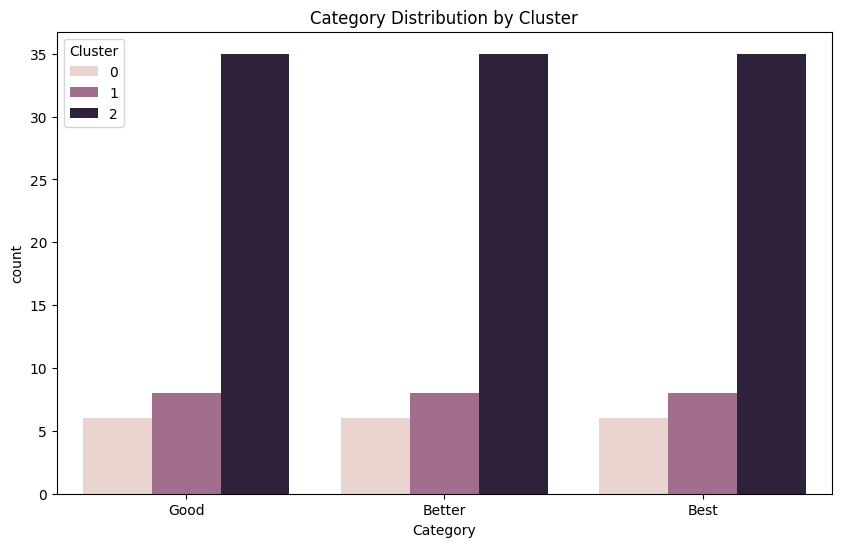

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Cluster', data=cluster_df)
plt.title('Category Distribution by Cluster')
plt.show()

In [ ]:
cluster_df_1.describe()

Profit_Margin  Cluster
count      24.000000     24.0
mean       -6.859492      1.0
std        11.671534      0.0
min       -27.857143      1.0
25%        -9.580474      1.0
50%        -6.547619      1.0
75%        -3.153852      1.0
max        10.212681      1.0

In [ ]:
state_profit = cluster_df_1.groupby('State')['Profit_Margin'].mean()
customer_profit = cluster_df_1.groupby('customer_name')['Profit_Margin'].mean()

#### Check if it's one-to-one relationship

In [ ]:
one_on_one = cluster_df_1.dropna(subset=['State']).groupby('State')['customer_name'].nunique().eq(1).all() and cluster_df_1.dropna(subset=['State']).groupby('customer_name')['State'].nunique().eq(1).all()

In [ ]:
one_on_one

False

In [ ]:
state_profit

State
CO    -6.852913
FL    -6.547619
GA    10.212681
IN     7.027451
LA   -27.857143
MI    -6.547619
VA   -17.763158
WA    -6.547619
Name: Profit_Margin, dtype: float64

In [ ]:
customer_profit

customer_name
EBAY CASH SALES   -8.843341
WOOD-MIZER LLC     7.027451
Name: Profit_Margin, dtype: float64

In [ ]:
bad_cluster = cluster_df_1['customer_name'].unique().tolist()
good_cluster = cluster_df_0['customer_name'].unique().tolist()

In [ ]:
intersect_names = set(bad_cluster).intersection(good_cluster)
intersect_names

set()

### Not much use

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for category in ['customer_category','State','Stock']:

  model = ols(f'Differences ~ C({category})', data=abr_df).fit()
  anova_results = sm.stats.anova_lm(model, typ=2)  # type 2 ANOVA DataFrame

  print(anova_results)

                            sum_sq     df          F        PR(>F)
C(customer_category)  17197.116218    2.0  44.068966  3.562602e-18
Residual              86046.132525  441.0        NaN           NaN
                sum_sq     df          F        PR(>F)
C(State)  38730.653464   13.0  19.817946  1.989545e-36
Residual  64191.969857  427.0        NaN           NaN
                sum_sq     df          F        PR(>F)
C(Stock)  13264.535397    1.0  65.159018  6.601335e-15
Residual  89978.713345  442.0        NaN           NaN


In [ ]:
company_df = han_df.groupby(['customer_name','Year-Month'])['Profit_Margin'].median().reset_index()

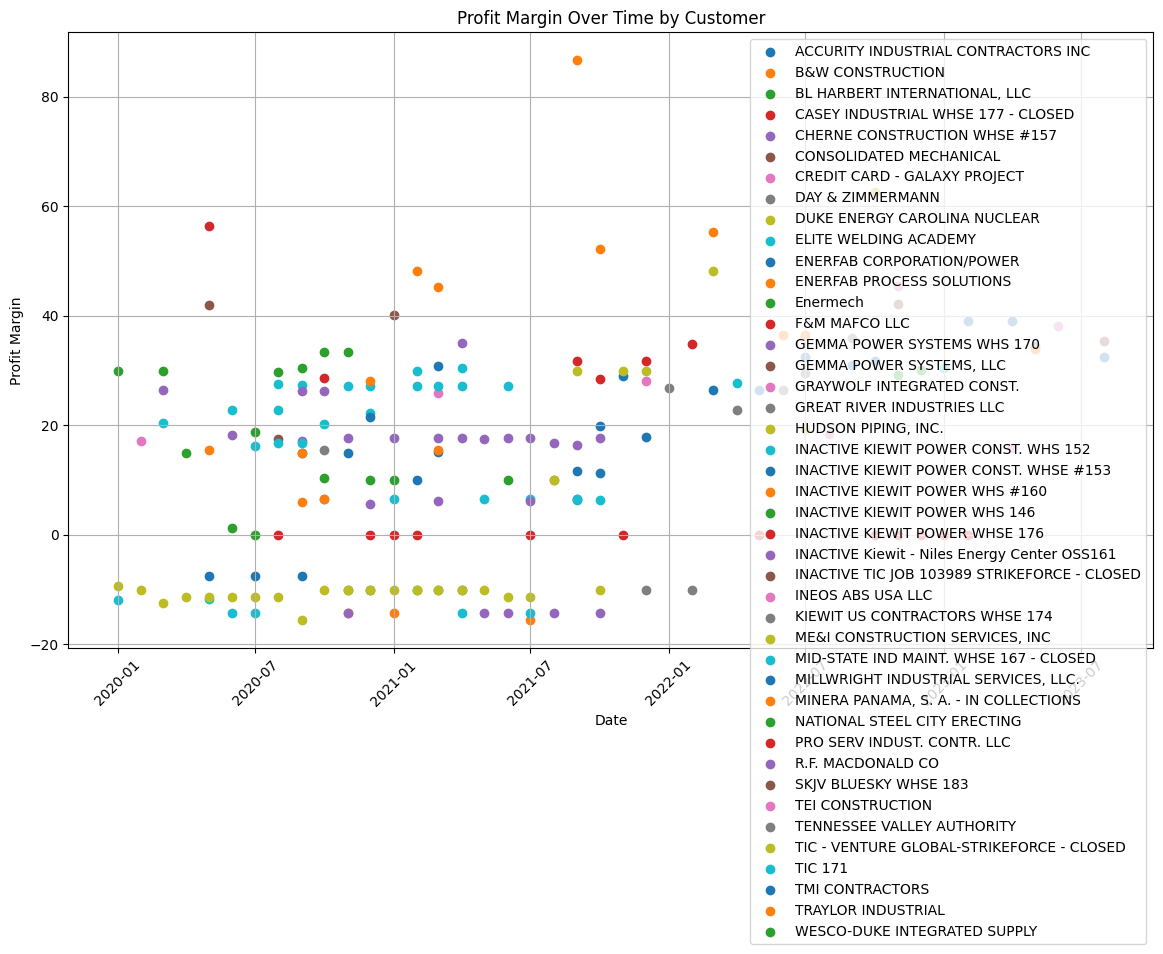

In [ ]:
plt.figure(figsize=(14, 8))
for customer in company_df['customer_name'].unique():
    temp_df = company_df[company_df['customer_name'] == customer]
    plt.scatter(temp_df['Year-Month'], temp_df['Profit_Margin'], marker='o', label=customer)

plt.title('Profit Margin Over Time by Customer')
plt.xlabel('Date')
plt.ylabel('Profit Margin')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
viz_df = abr_df.groupby(['customer_category','Date'])['Profit_Margin'].mean().reset_index()
viz_df['Date'] = pd.to_datetime(viz_df['Date'])
viz_df = viz_df.sort_values('Date')

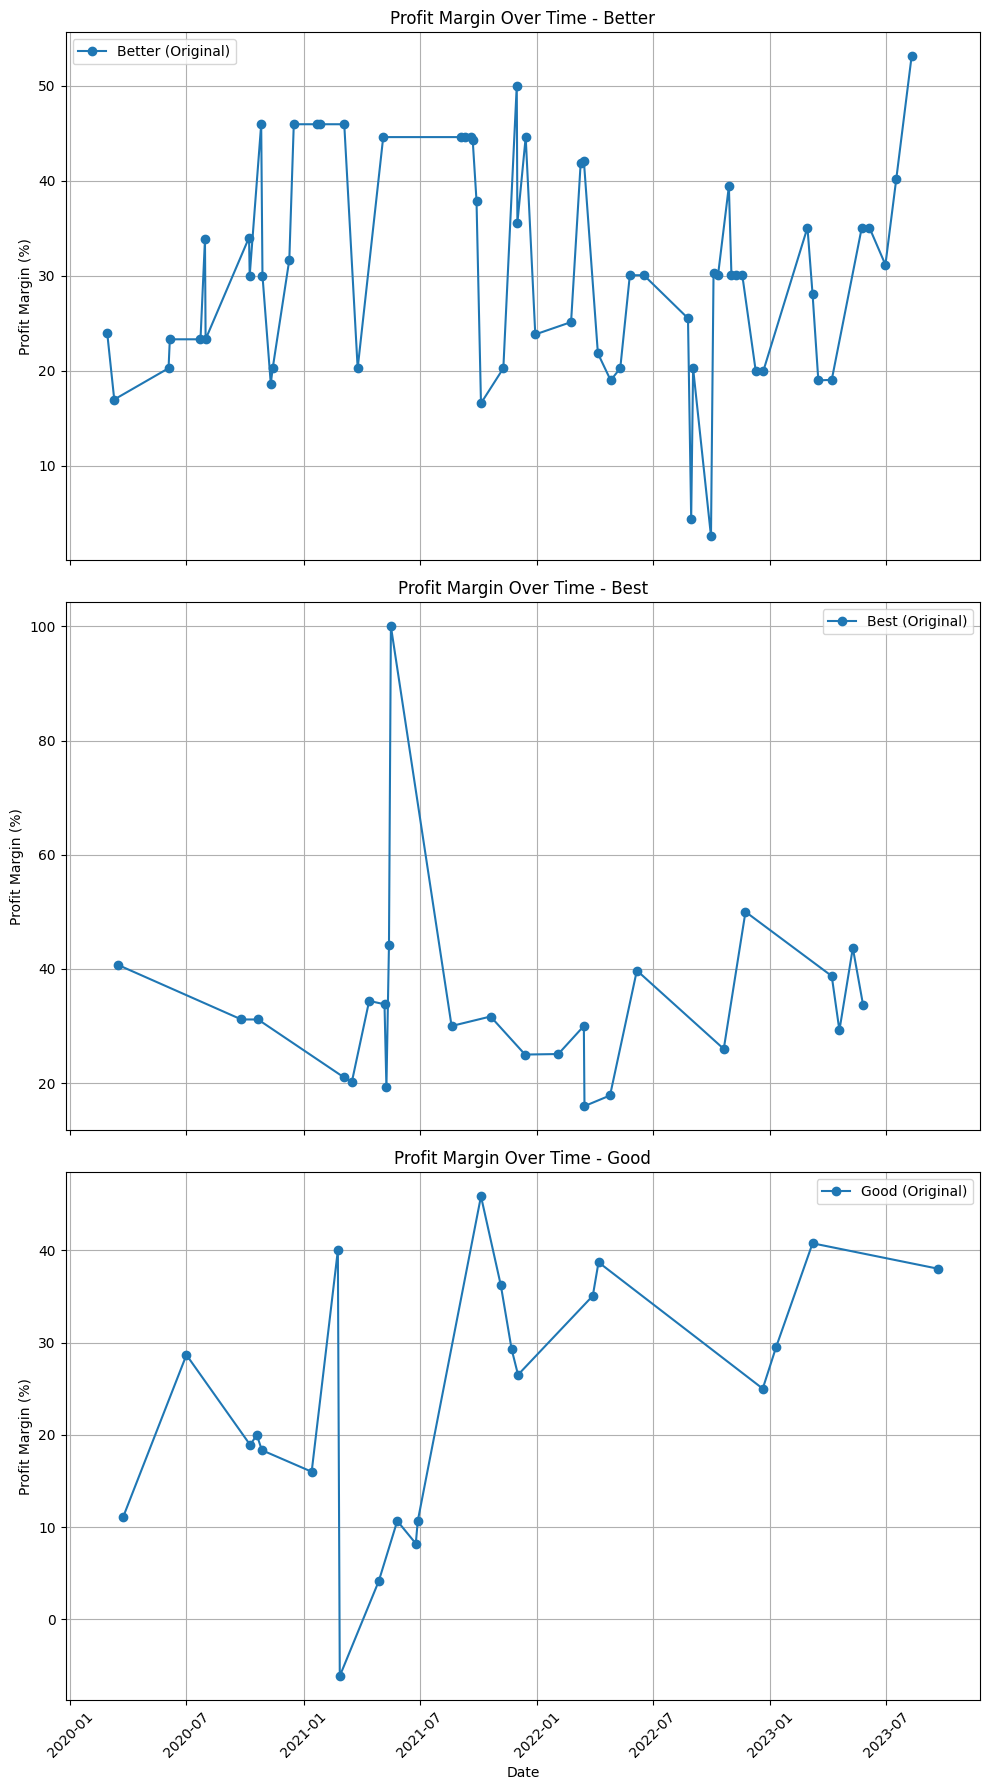

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18), sharex=True)

categories = viz_df['customer_category'].unique()

for i, category in enumerate(categories):
    subset = viz_df[viz_df['customer_category'] == category]

    axes[i].plot(subset['Date'], subset['Profit_Margin'], marker='o', linestyle='-', label=f"{category} (Original)")

    axes[i].set_title(f'Profit Margin Over Time - {category}')
    axes[i].set_ylabel('Profit Margin (%)')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
label_encoders = {}
for col in ['customer_name', 'customer_category', 'Unit', 'State', 'Stock','Date']:
    le = LabelEncoder()
    abr_df[col] = le.fit_transform(abr_df[col])
    label_encoders[col] = le  # Store encoder if needed later

# Select numeric features for clustering
numeric_features = ['Profit_Margin']
X = abr_df[numeric_features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
abr_df['Cluster'] = kmeans.fit_predict(X_scaled)

<ipython-input-95-2c02ac6a1762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abr_df[col] = le.fit_transform(abr_df[col])
<ipython-input-95-2c02ac6a1762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abr_df[col] = le.fit_transform(abr_df[col])
<ipython-input-95-2c02ac6a1762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
def plot_trend(product_class,df):
  temp_rows = df[df['Product_Class']==product_class]
  plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
  plt.plot(temp_rows['Year'], temp_rows['Profit_Margin'], marker='o', linestyle='-')  # Added markers for clarity
  plt.title(f'Profit Margin Trend for Product Class {product_class}')  # Optional: Add a title
  plt.xlabel('Year')
  plt.ylabel('Profit Margin')
  # plt.xticks(rotation=45)  # Optional: Rotate date labels for better readability
  plt.tight_layout()  # Optional: Adjust layout to make room for the rotated date labels
  plt.show()

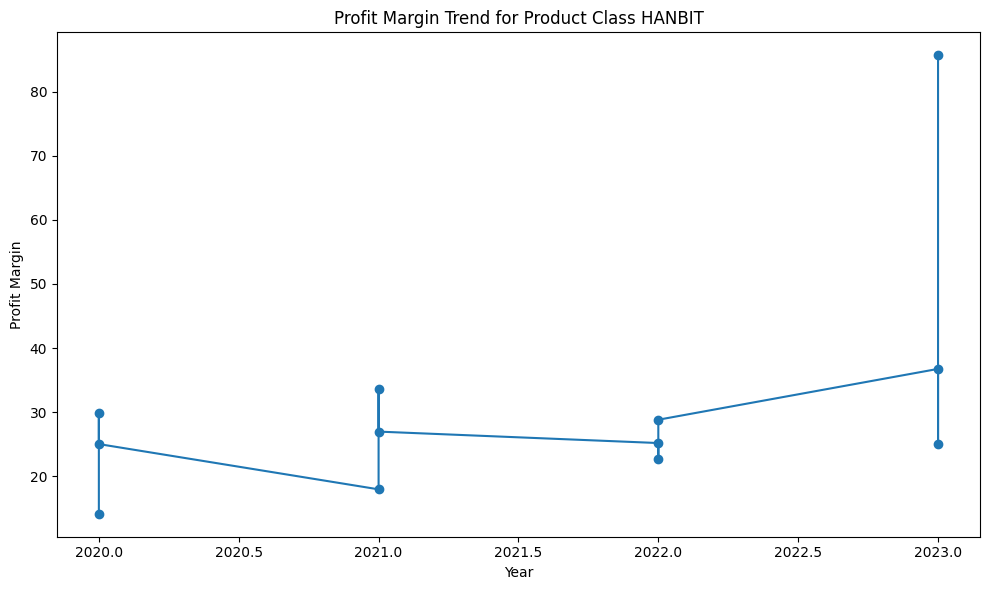

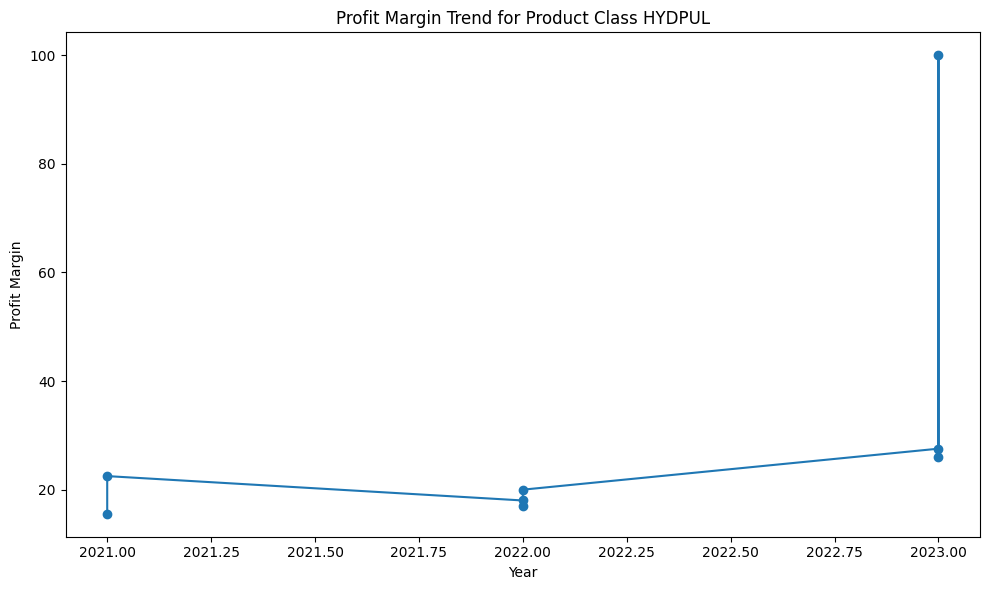

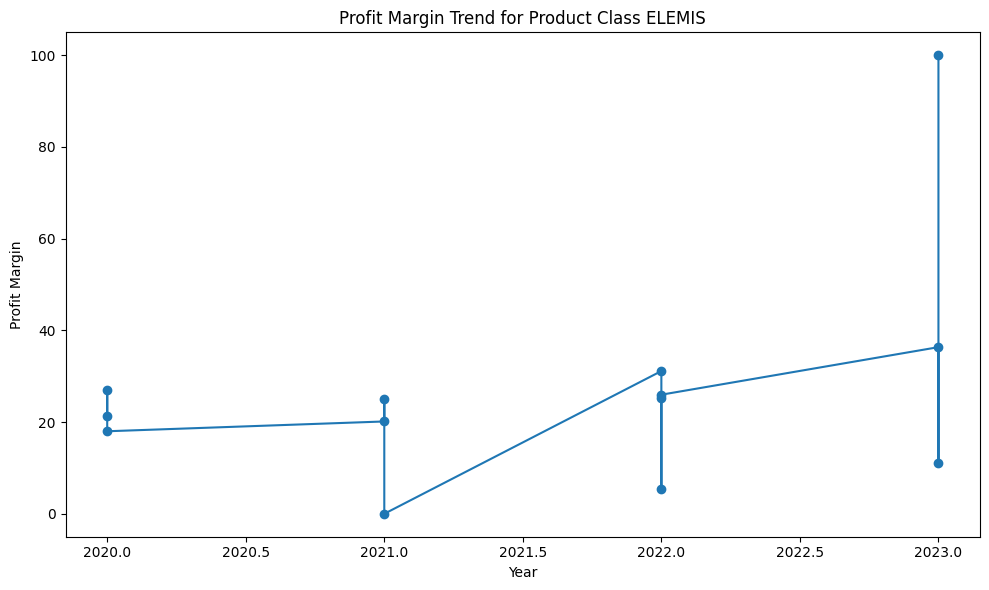

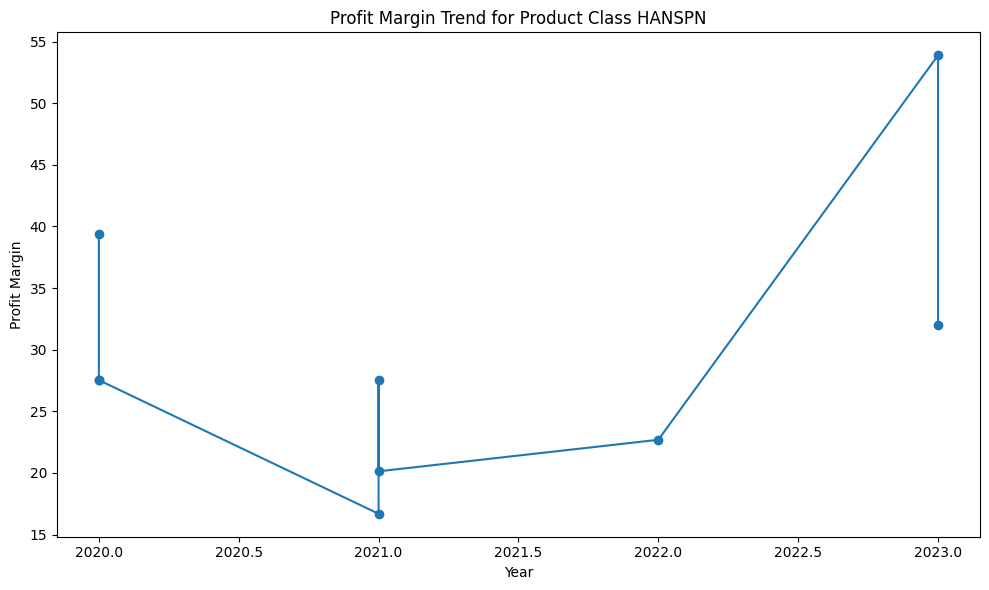

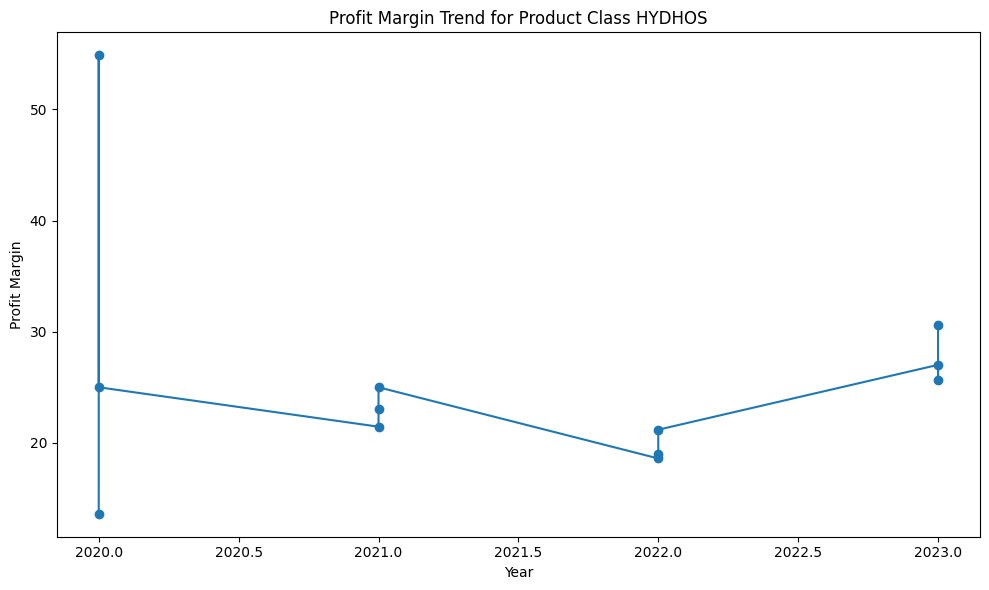

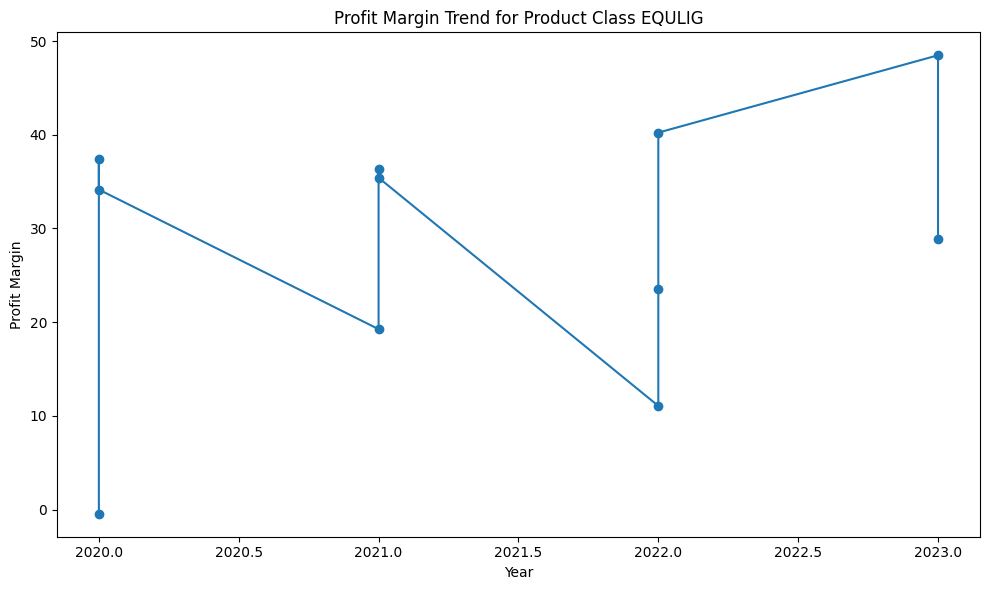

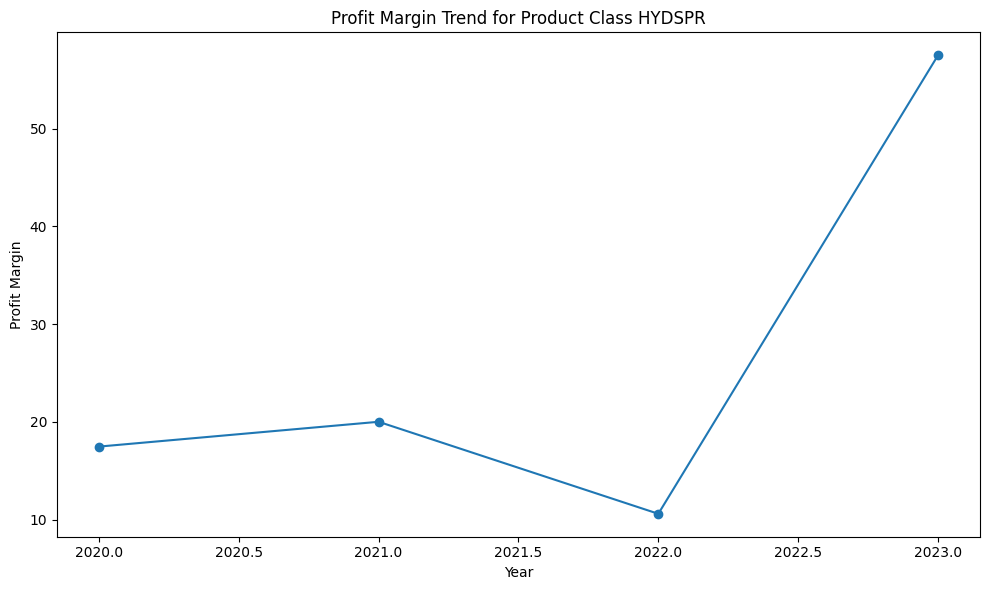

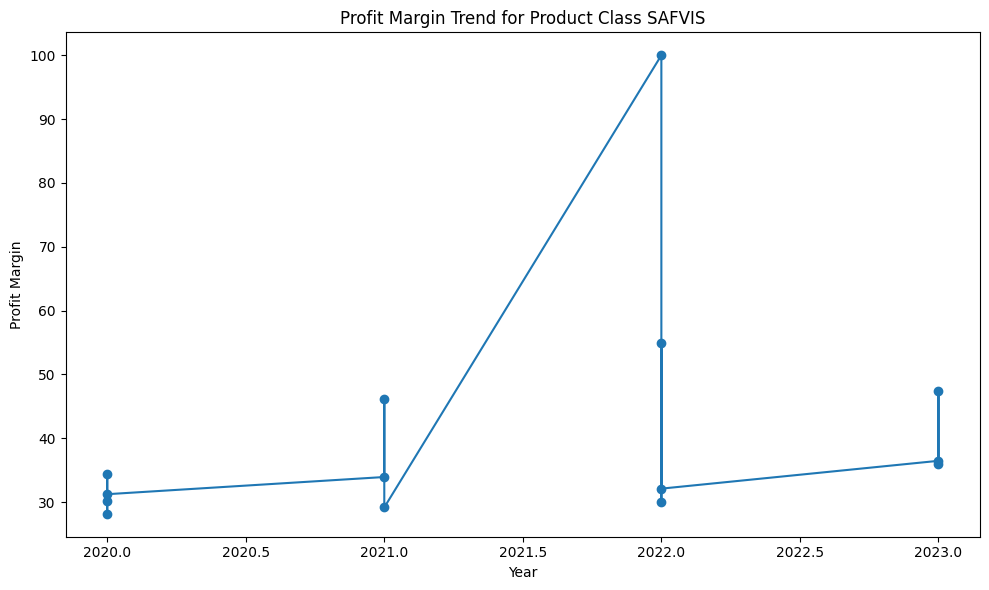

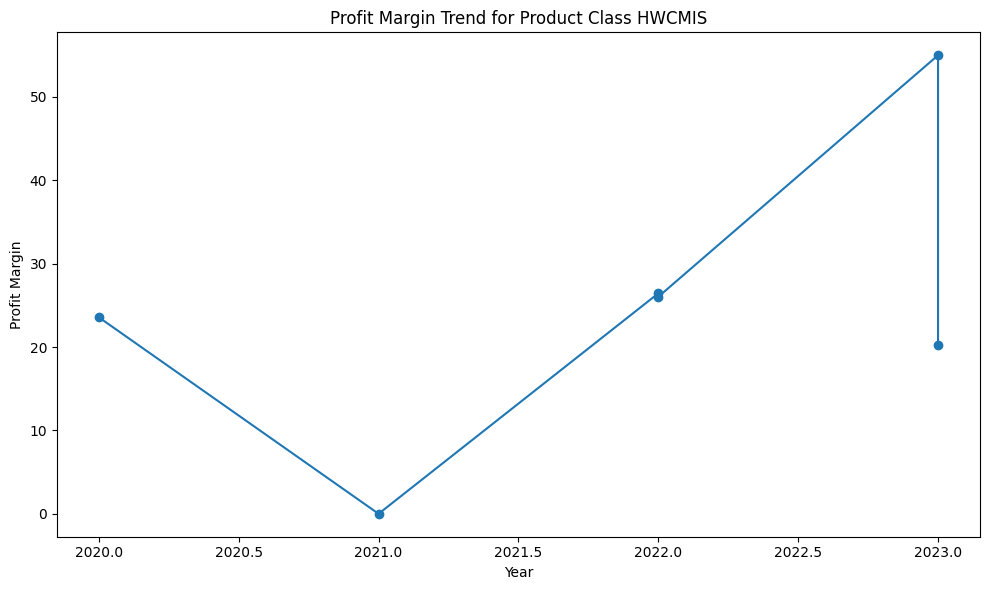

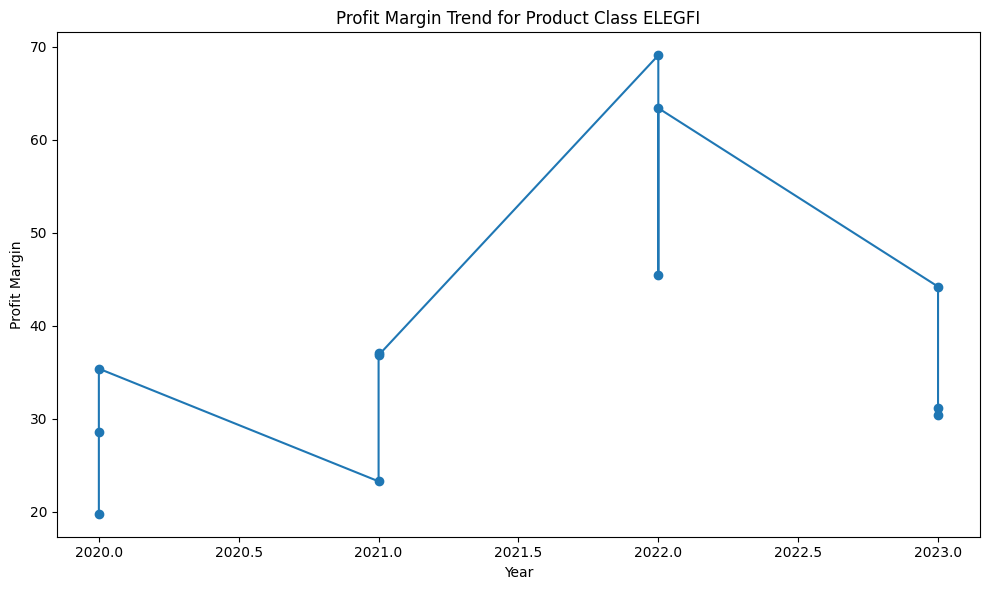

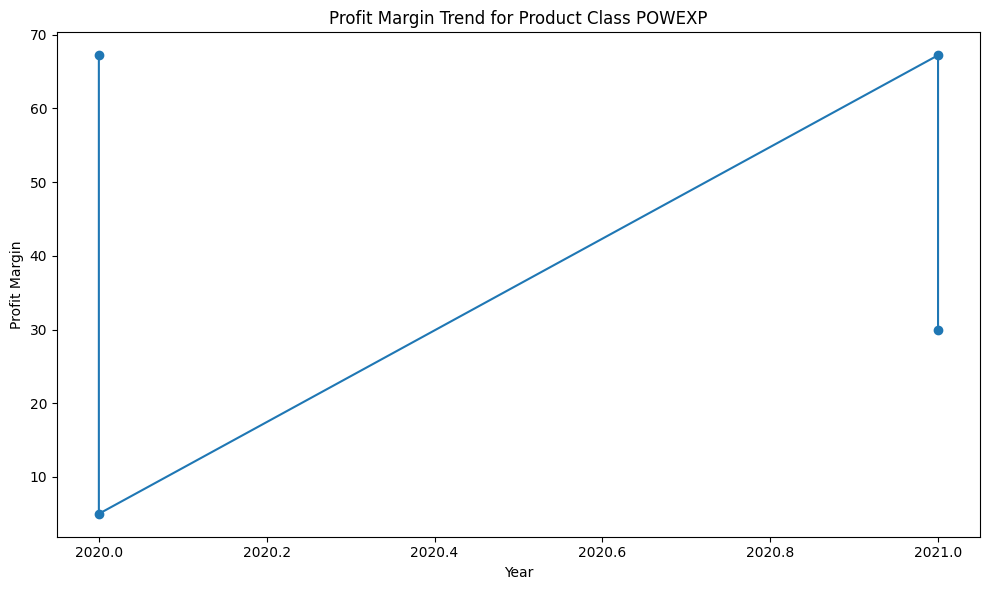

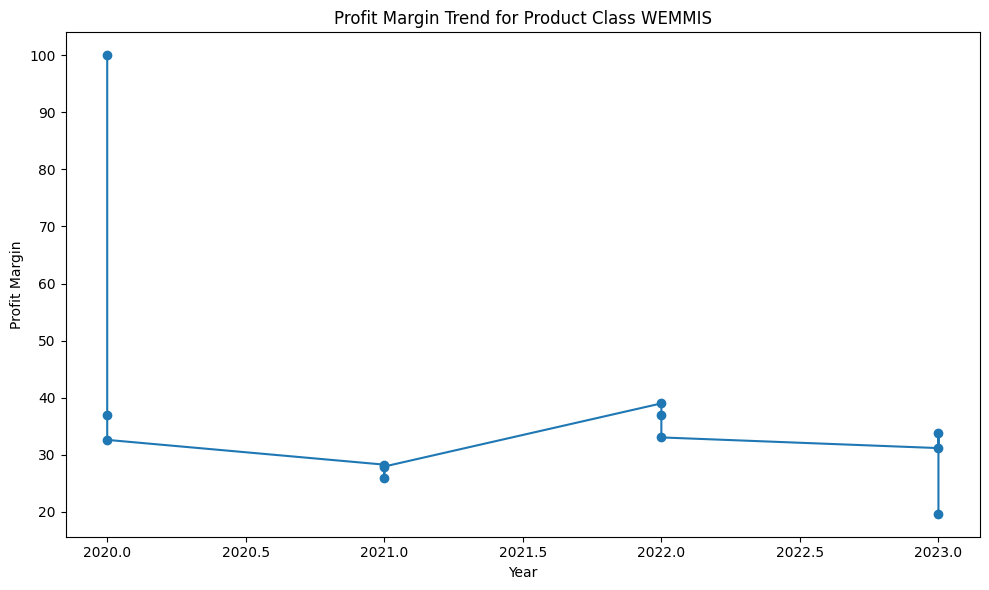

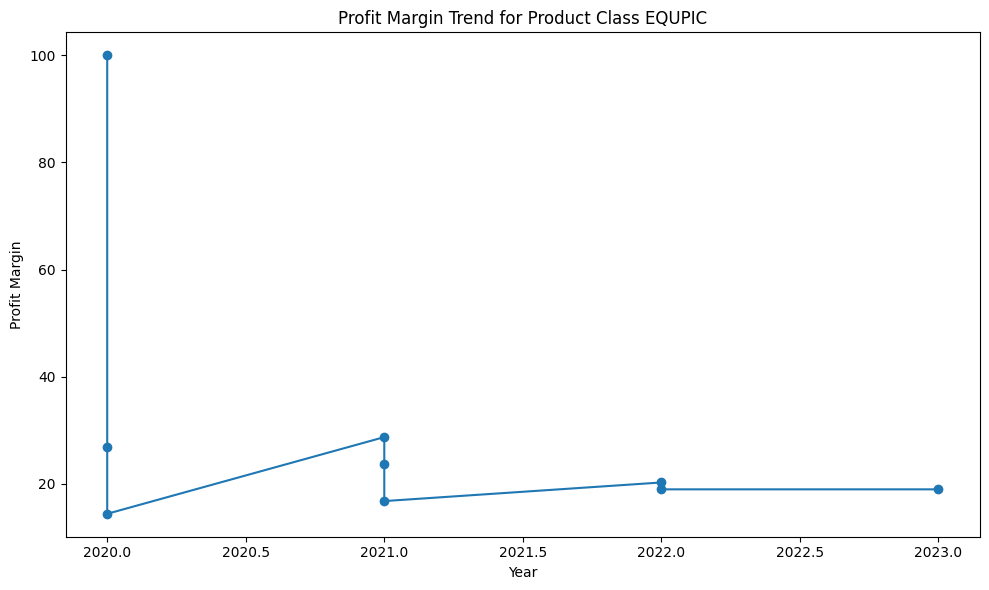

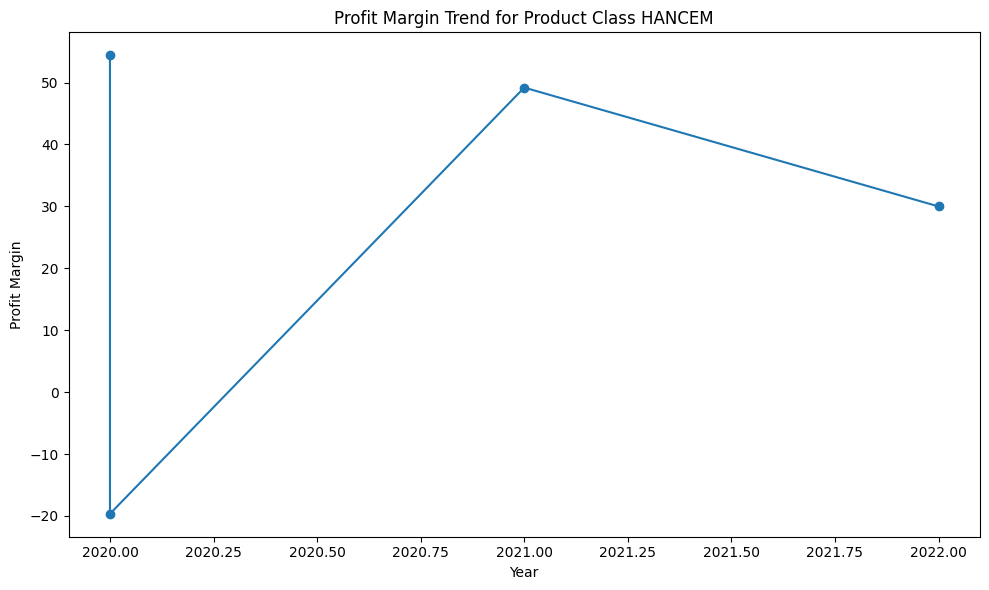

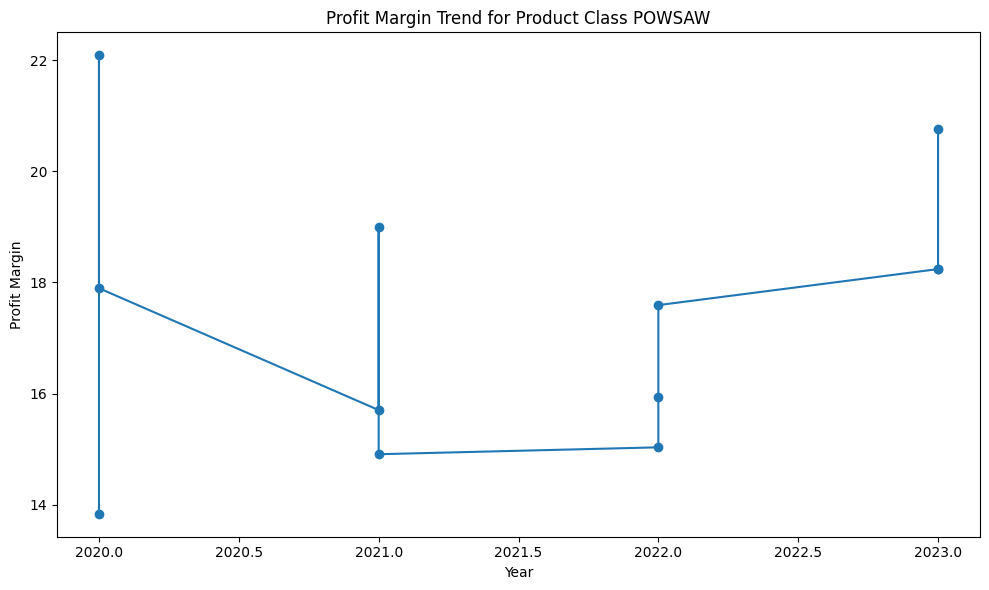

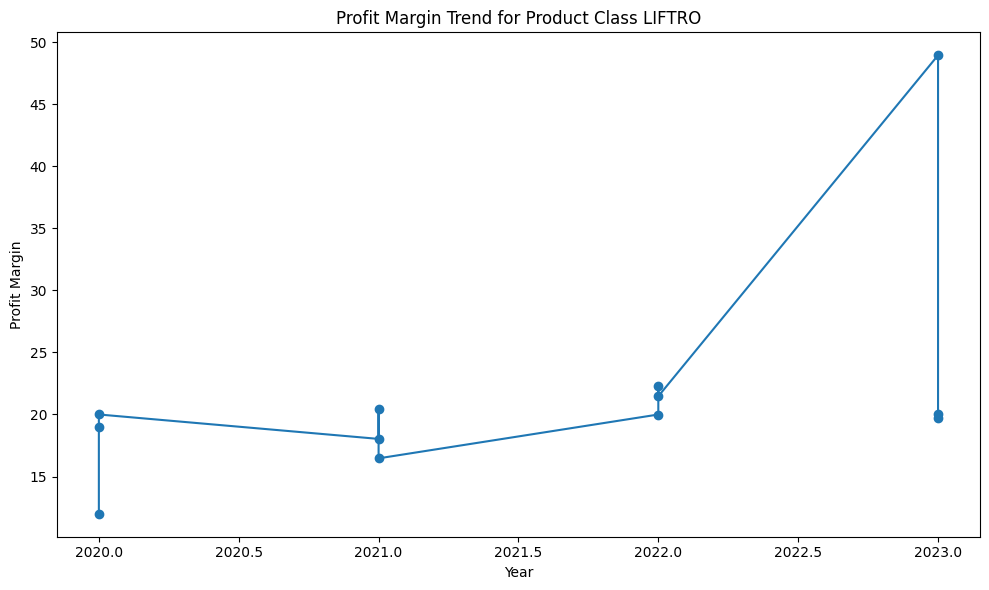

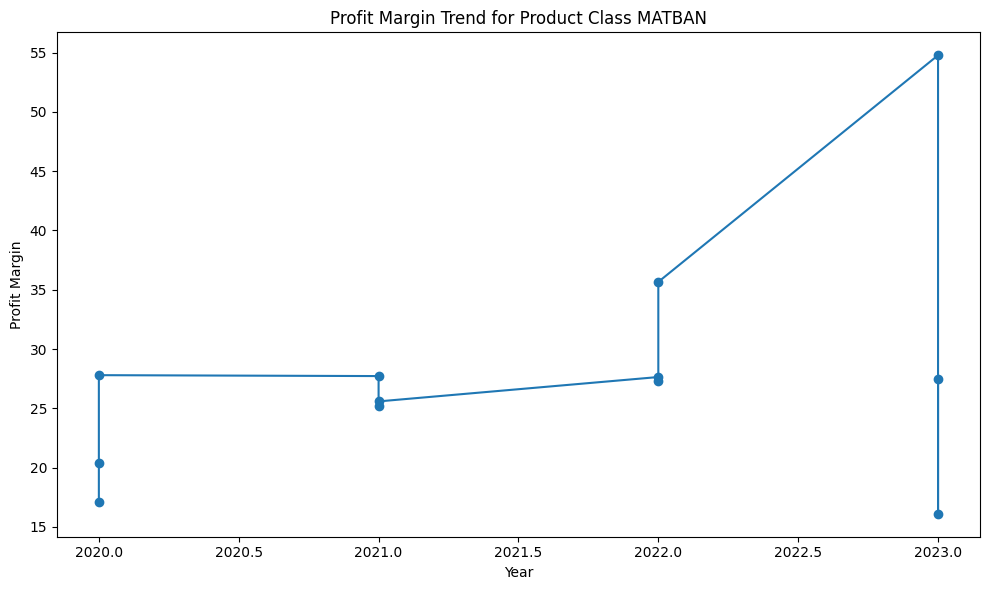

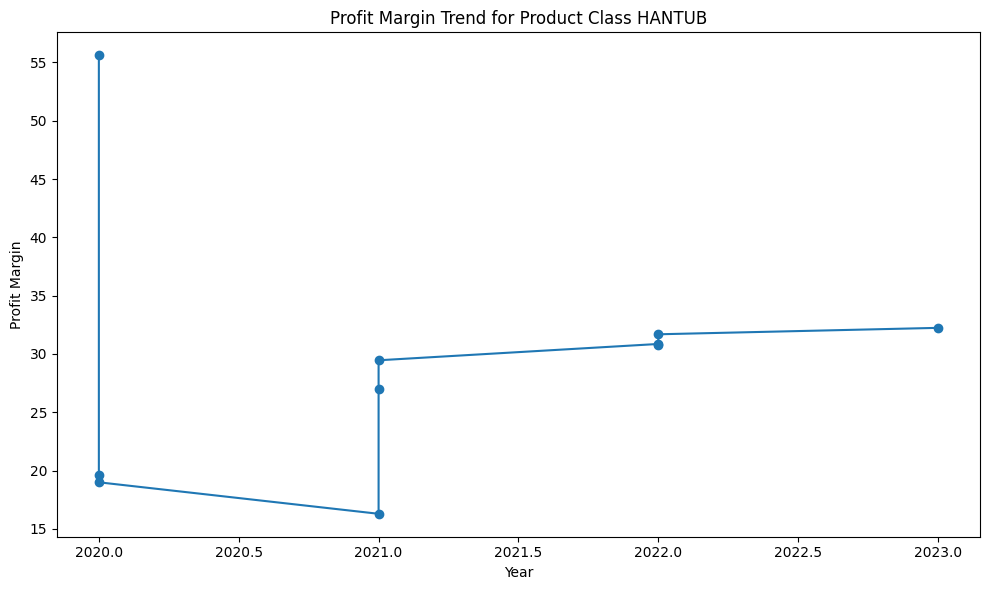

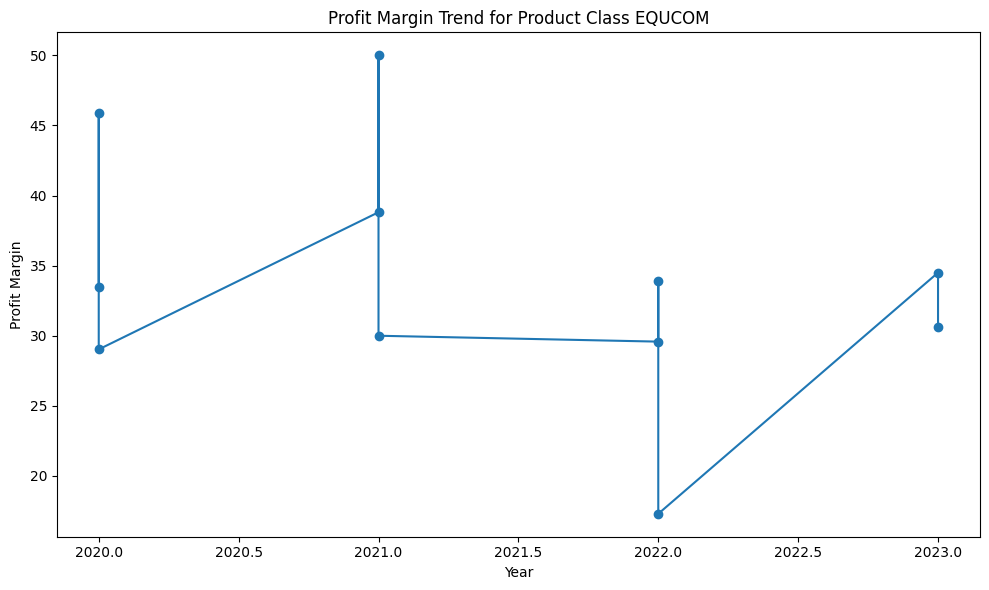

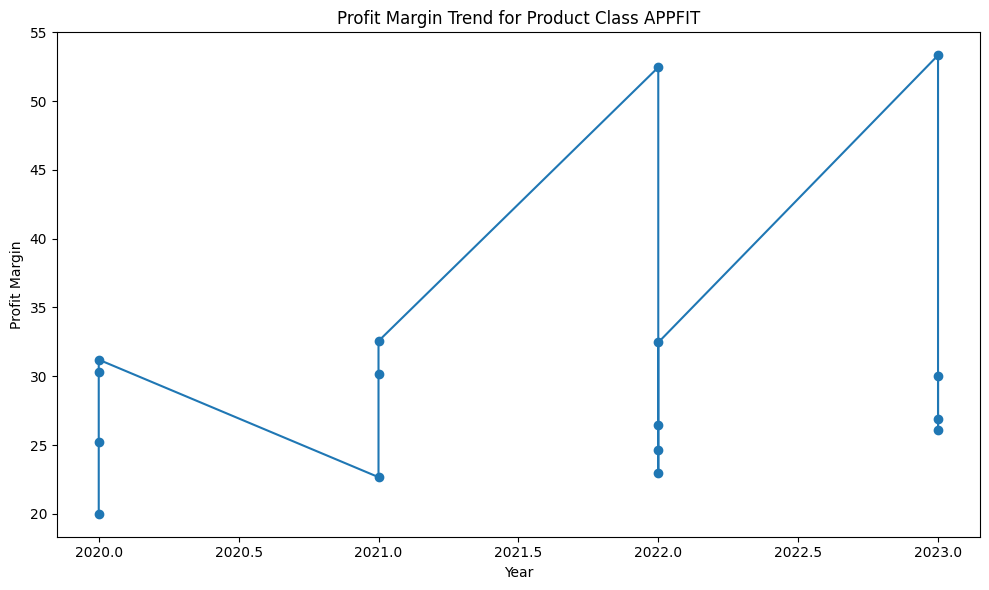

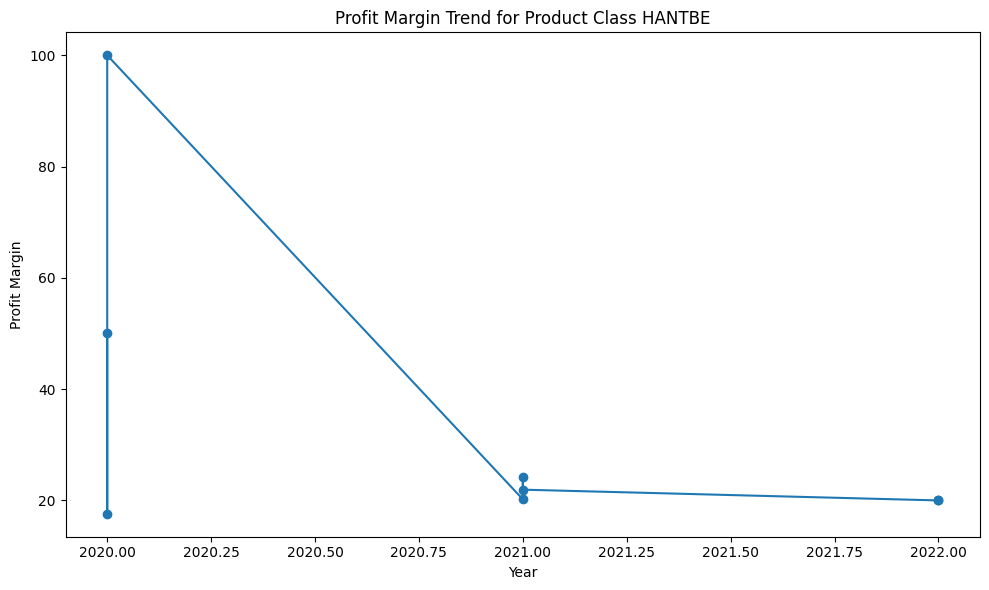

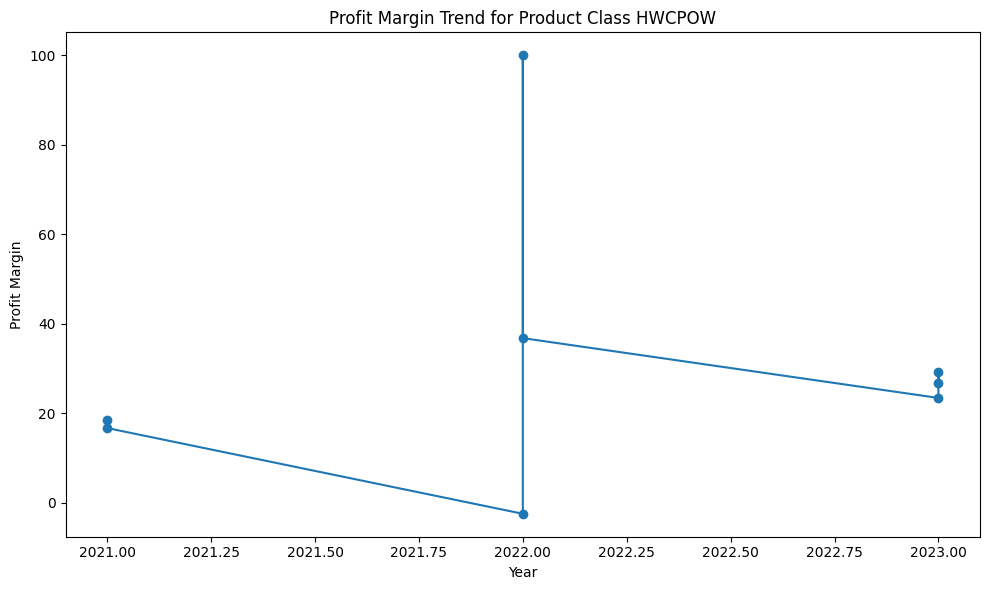

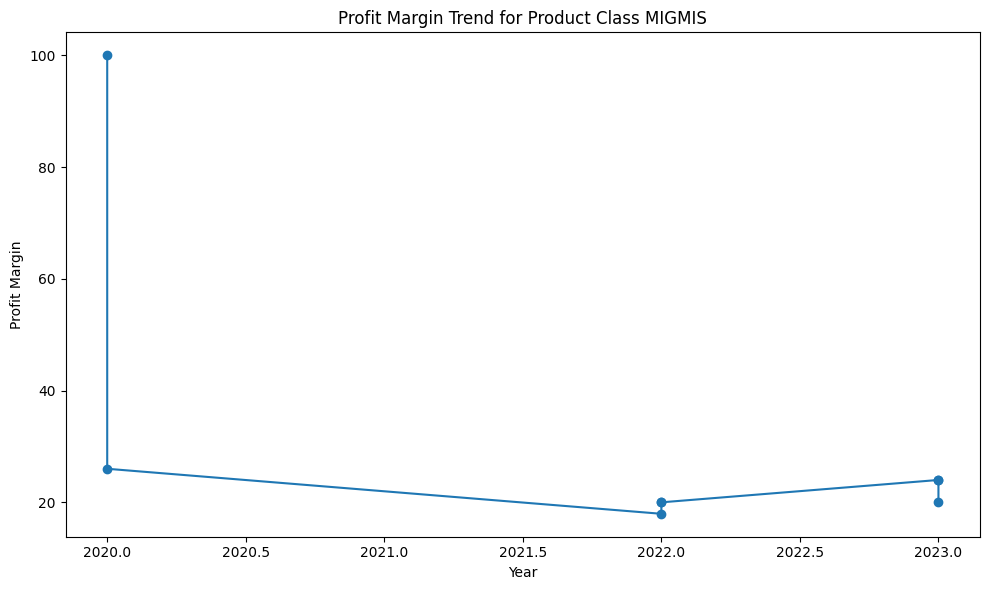

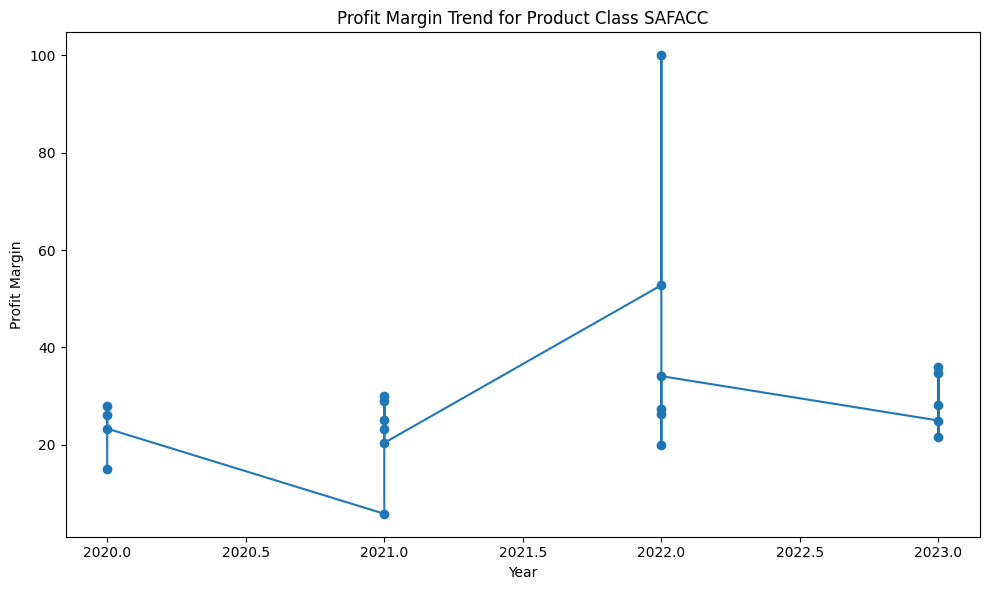

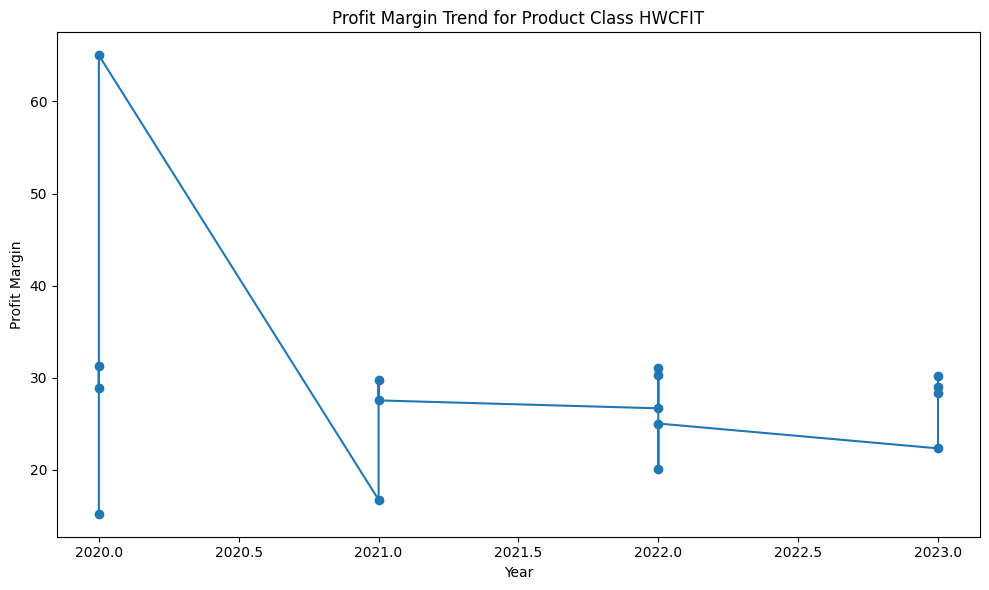

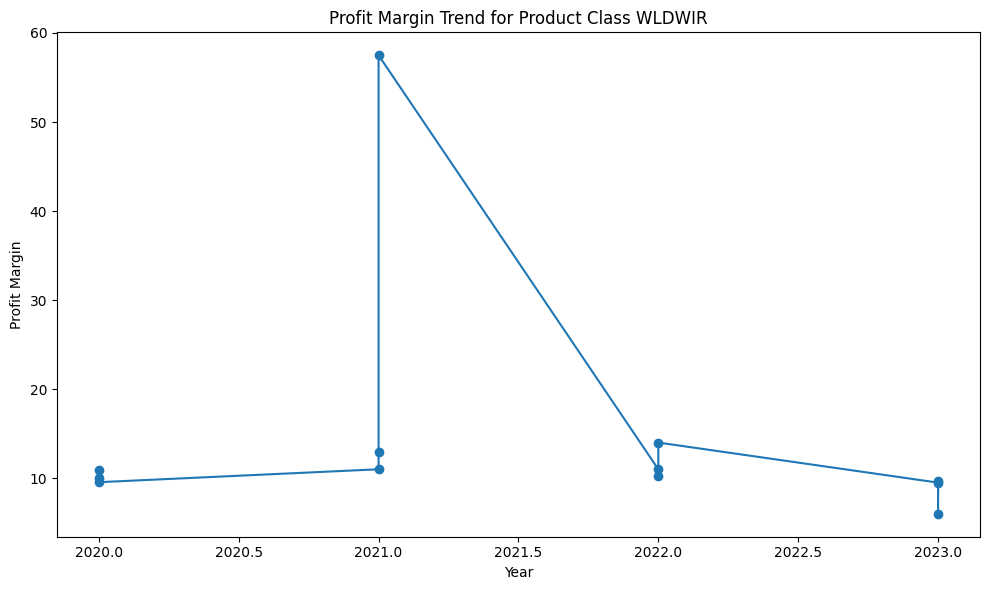

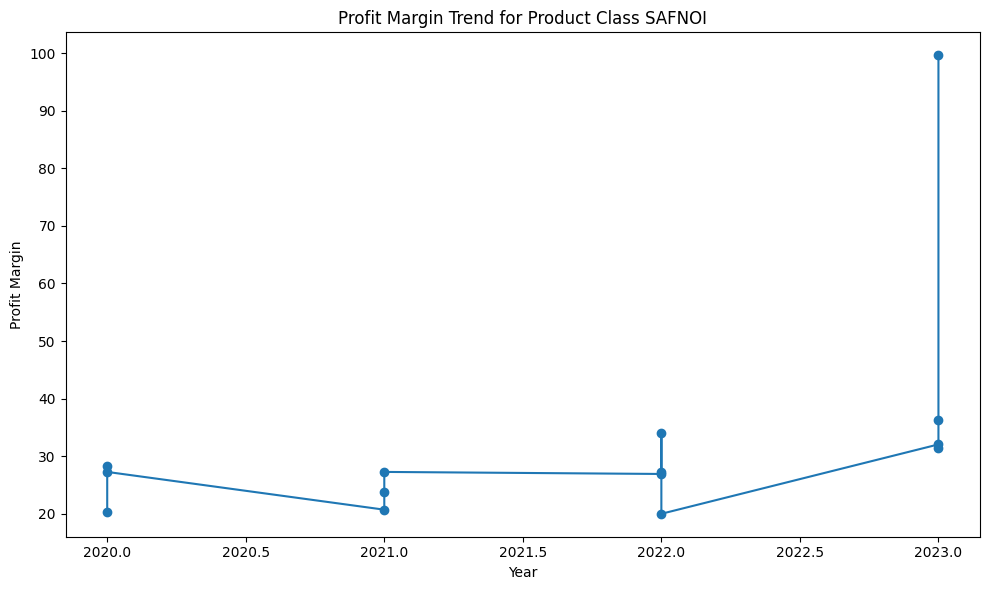

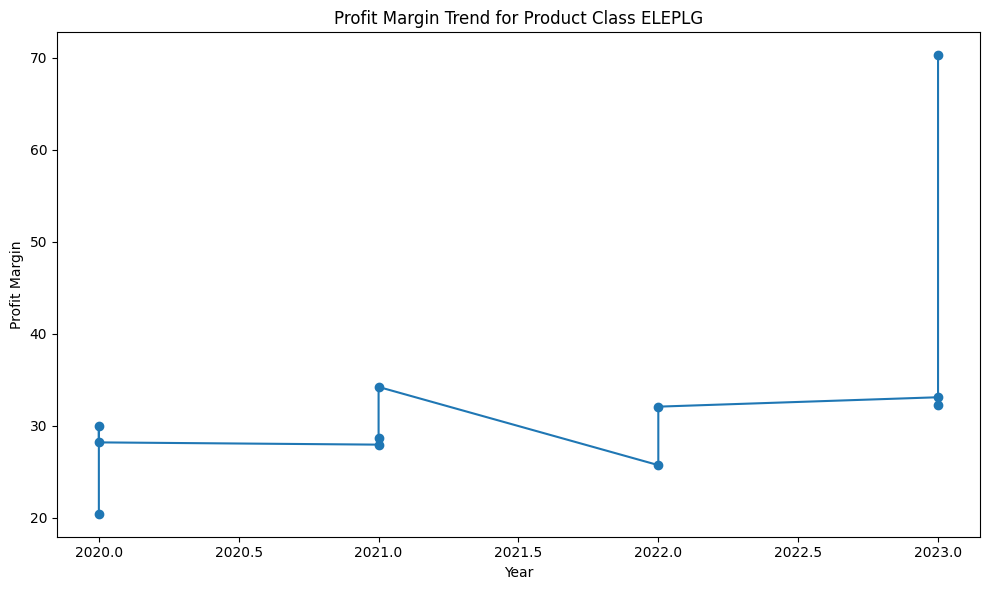

In [ ]:
def produce_product_list(df):
  instance_counts = df.groupby(['Item Group', 'Product Class']).size().reset_index()
  instance_counts.rename(columns={0: 'Counts'}, inplace=True)
  product_list = instance_counts[instance_counts['Counts'] > 1]['Product Class'].tolist()
  temp_df = df[df['Product Class'].isin(product_list)]
  temp_df_sorted = temp_df.sort_values(by=['Item Group', 'Product Class','Year'])
  final_df = temp_df_sorted.drop(columns=['Category'])
  return final_df

In [ ]:
bad_product = produce_product_list(outlier_df_bad)

In [ ]:
bad_product

Year            Item Group Product Class Customer Category  Actual Margin  \
2   2020  Const Supplies CS/SD        BRUHAN              Good       9.624413   
65  2020  Const Supplies CS/SD        BRUHAN            Better       5.839416   
11  2021  Const Supplies CS/SD        BRUHAN              Good       5.839416   
74  2021  Const Supplies CS/SD        BRUHAN            Better       5.839416   
64  2020  Const Supplies CS/SD        CUTMIS            Better       8.000000   
78  2021  Const Supplies CS/SD        CUTMIS            Better       1.500000   
16  2021  Const Supplies CS/SD        ELEMIS              Good       0.000000   
28  2022  Const Supplies CS/SD        ELEMIS              Good       0.343113   
96  2023  Const Supplies CS/SD        ELEMIS            Better       9.883135   
68  2020  Const Supplies CS/SD        HANPLU            Better     -11.250000   
79  2021  Const Supplies CS/SD        HANPLU            Better     -10.000000   
82  2022  Const Supplies CS/SD        HWCWEL            Better       3.438994   
93  2023  Const Supplies CS/SD        HWCWEL            Better     -23.388889   
25  2022  Const Supplies CS/SD        HYDPAR              Good       0.000000   
84  2022  Const Supplies CS/SD        HYDPAR            Better       6.068806   
13  2021  Const Supplies CS/SD        MAIRAG              Good      12.974684   
76  2021  Const Supplies CS/SD        MAIRAG            Better      14.062500   
9   2021  Const Supplies CS/SD        MATFUR              Good       0.000000   
31  2023  Const Supplies CS/SD        MATFUR              Good     -10.800000   
67  2020  Const Supplies CS/SD        SAFBOO            Better      10.740741   
71  2021  Const Supplies CS/SD        SAFBOO            Better       5.895062   
42  2020  Const Supplies CS/SD        SAFLEN              Best     -30.752137   
87  2022  Const Supplies CS/SD        SAFLEN            Better      10.699588   
6   2020   Welding Equip WS/SD        FILCLA              Good     -15.459459   
21  2021   Welding Equip WS/SD        FILCLA              Good     -18.918919   
29  2022   Welding Equip WS/SD        FILCLA              Good      -2.491841   
47  2021   Welding Equip WS/SD        MIGACC              Best       0.035842   
53  2022   Welding Equip WS/SD        MIGACC              Best       0.035842   

    Target Margin  Margin Difference(%)  
2            38.0            -28.375587  
65           36.0            -30.160584  
11           38.0            -32.160584  
74           36.0            -30.160584  
64           40.0            -32.000000  
78           40.0            -38.500000  
16           38.0            -38.000000  
28           38.0            -37.656887  
96           36.0            -26.116865  
68           29.0            -40.250000  
79           29.0            -39.000000  
82           29.0            -25.561006  
93           29.0            -52.388889  
25           38.0            -38.000000  
84           36.0            -29.931194  
13           42.0            -29.025316  
76           40.0            -25.937500  
9            26.0            -26.000000  
31           26.0            -36.800000  
67           36.0            -25.259259  
71           36.0            -30.104938  
42           34.0            -64.752137  
87           36.0            -25.300412  
6            26.0            -41.459459  
21           26.0            -44.918919  
29           26.0            -28.491841  
47           28.0            -27.964158  
53           28.0            -27.964158

In [ ]:
good_product = produce_product_list(outlier_df_good)

In [ ]:
good_product

Year            Item Group Product Class Customer Category  Actual Margin  \
85  2022  Const Supplies CS/SD        APPFIT            Better      54.347826   
94  2023  Const Supplies CS/SD        APPFIT            Better      53.333333   
27  2022  Const Supplies CS/SD        ELEGFI              Good      75.557565   
49  2022  Const Supplies CS/SD        ELEGFI              Best      71.927355   
41  2020  Const Supplies CS/SD        POWEXP              Best      67.205556   
45  2021  Const Supplies CS/SD        POWEXP              Best      67.205556   
54  2022   Welding Equip WS/SD        SAFNOI              Best      99.595960   
63  2023   Welding Equip WS/SD        SAFNOI              Best      99.636672   

    Target Margin  Margin Difference(%)  
85           24.0             30.347826  
94           24.0             29.333333  
27           38.0             37.557565  
49           34.0             37.927355  
41           12.0             55.205556  
45           12.0             55.205556  
54           34.0             65.595960  
63           34.0             65.636672

In [ ]:
unique_pairs_list = list(good_product[['Item Group', 'Product Class']].drop_duplicates().itertuples(index=False, name=None))
unique_pairs_list

[('Const Supplies CS/SD', 'APPFIT'),
 ('Const Supplies CS/SD', 'ELEGFI'),
 ('Const Supplies CS/SD', 'POWEXP'),
 ('Welding Equip WS/SD', 'SAFNOI')]

In [ ]:
outlier_df[outlier_df['Product Class']=='BRUHAN']

Year            Item Group Product Class Customer Category  Actual Margin  \
2   2020  Const Supplies CS/SD        BRUHAN              Good       9.624413   
11  2021  Const Supplies CS/SD        BRUHAN              Good       5.839416   
65  2020  Const Supplies CS/SD        BRUHAN            Better       5.839416   
74  2021  Const Supplies CS/SD        BRUHAN            Better       5.839416   

   Category  Target Margin  Margin Difference(%)  
2      Good           38.0            -28.375587  
11     Good           38.0            -32.160584  
65   Better           36.0            -30.160584  
74   Better           36.0            -30.160584

#### Outlier Analysis

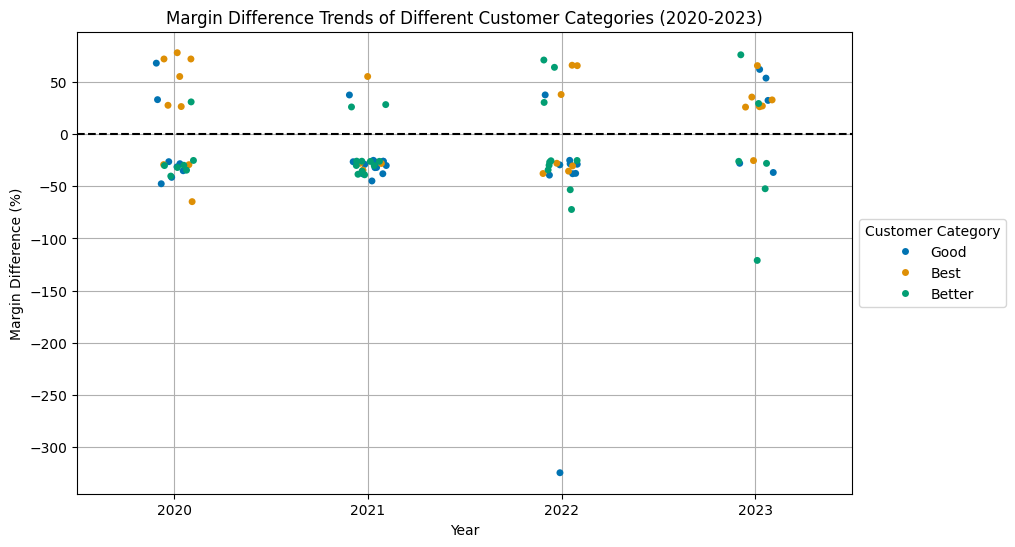

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=outlier_df, x='Year', y='Margin Difference(%)', hue='Customer Category', palette='colorblind')
plt.title('Margin Difference Trends of Different Customer Categories (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Margin Difference (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0

# Add legend with title
plt.legend(title='Customer Category', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.show()

<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
<ipython-input-166-768952f86c84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=outlier_record[outlier_record['Year'] == y

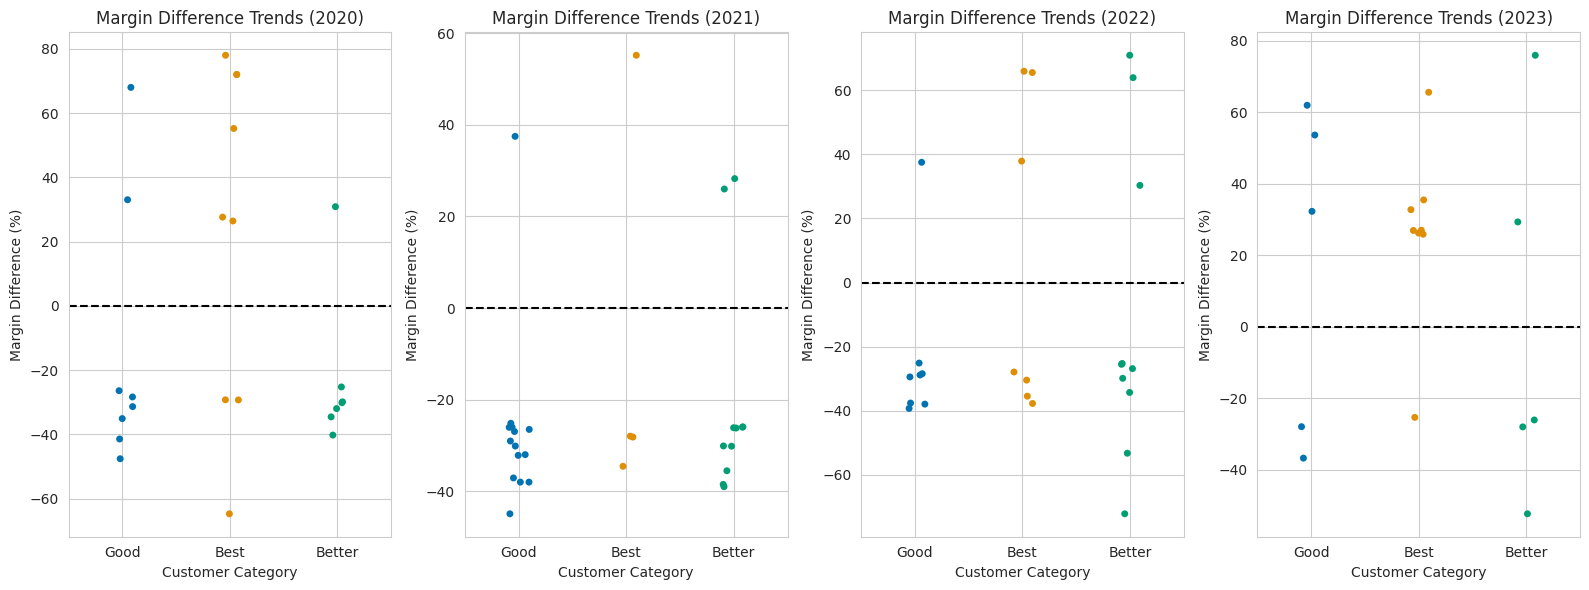

In [ ]:
outlier_record = outlier_df [(~(outlier_df['Product Class'] == 'BRUMIS'))&(~(outlier_df ['Product Class'] == 'FILELC'))]
years = outlier_record['Year'].unique()

plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

for i, year in enumerate(years, 1):
    plt.subplot(1, len(years), i)
    sns.stripplot(data=outlier_record[outlier_record['Year'] == year], x='Customer Category', y='Margin Difference(%)', palette='colorblind')
    plt.title(f'Margin Difference Trends ({year})')
    plt.xlabel('Customer Category')
    plt.ylabel('Margin Difference (%)')
    plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
product_class_counts = outlier_record.groupby('Product Class')['Customer Category'].nunique().reset_index()

In [ ]:
changed_product = product_class_counts[product_class_counts['Customer Category'] != 1]['Product Class'].tolist()

In [ ]:
changed_product_df = outlier_record[outlier_record['Product Class'].isin(changed_product)].sort_values(['Item Group','Product Class'])

In [ ]:
changed_product_df

Year            Item Group Product Class Customer Category  Actual Margin  \
2   2020  Const Supplies CS/SD        BRUHAN              Good       9.624413   
11  2021  Const Supplies CS/SD        BRUHAN              Good       5.839416   
65  2020  Const Supplies CS/SD        BRUHAN            Better       5.839416   
74  2021  Const Supplies CS/SD        BRUHAN            Better       5.839416   
27  2022  Const Supplies CS/SD        ELEGFI              Good      75.557565   
49  2022  Const Supplies CS/SD        ELEGFI              Best      71.927355   
16  2021  Const Supplies CS/SD        ELEMIS              Good       0.000000   
28  2022  Const Supplies CS/SD        ELEMIS              Good       0.343113   
33  2023  Const Supplies CS/SD        ELEMIS              Good     100.000000   
96  2023  Const Supplies CS/SD        ELEMIS            Better       9.883135   
1   2020  Const Supplies CS/SD        HANCEM              Good     -15.614618   
38  2020  Const Supplies CS/SD        HANCEM              Best      54.404145   
15  2021  Const Supplies CS/SD        HWCMIS              Good       0.000000   
57  2023  Const Supplies CS/SD        HWCMIS              Best      55.000000   
25  2022  Const Supplies CS/SD        HYDPAR              Good       0.000000   
84  2022  Const Supplies CS/SD        HYDPAR            Better       6.068806   
13  2021  Const Supplies CS/SD        MAIRAG              Good      12.974684   
76  2021  Const Supplies CS/SD        MAIRAG            Better      14.062500   
46  2021  Const Supplies CS/SD        SAFACC              Best       5.831533   
86  2022  Const Supplies CS/SD        SAFACC            Better     100.000000   
42  2020  Const Supplies CS/SD        SAFLEN              Best     -30.752137   
87  2022  Const Supplies CS/SD        SAFLEN            Better      10.699588   
52  2022   Welding Equip WS/SD        HWCPOW              Best      -2.498524   
88  2022   Welding Equip WS/SD        HWCPOW            Better     100.000000   

   Category  Target Margin  Margin Difference(%)  
2      Good           38.0            -28.375587  
11     Good           38.0            -32.160584  
65   Better           36.0            -30.160584  
74   Better           36.0            -30.160584  
27     Good           38.0             37.557565  
49     Best           34.0             37.927355  
16     Good           38.0            -38.000000  
28     Good           38.0            -37.656887  
33     Good           38.0             62.000000  
96   Better           36.0            -26.116865  
1      Good           32.0            -47.614618  
38     Best           28.0             26.404145  
15     Good           32.0            -32.000000  
57     Best           28.0             27.000000  
25     Good           38.0            -38.000000  
84   Better           36.0            -29.931194  
13     Good           42.0            -29.025316  
76   Better           40.0            -25.937500  
46     Best           34.0            -28.168467  
86   Better           36.0             64.000000  
42     Best           34.0            -64.752137  
87   Better           36.0            -25.300412  
52     Best           28.0            -30.498524  
88   Better           29.0             71.000000

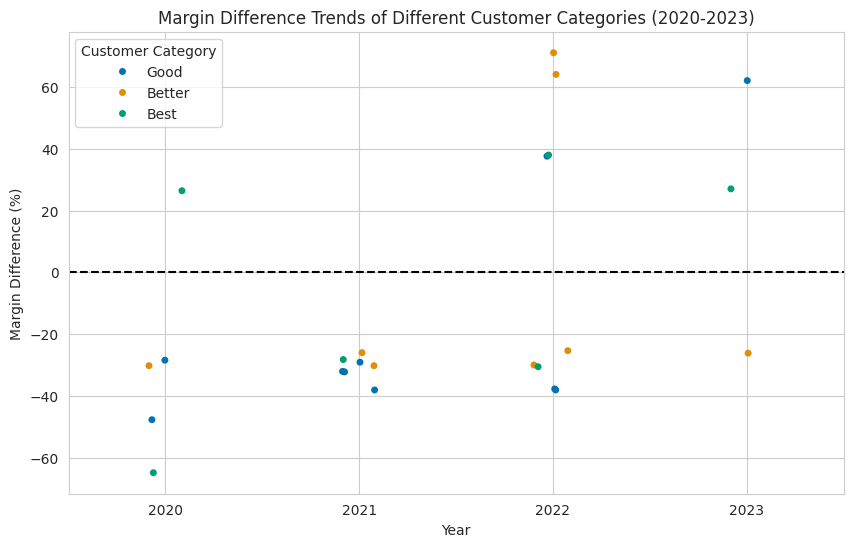

In [ ]:
sns.set_style("whitegrid")

# Create categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=changed_product_df, x='Year', y=changed_product_df['Margin Difference(%)'], hue='Customer Category', palette='colorblind')
plt.title('Margin Difference Trends of Different Customer Categories (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Margin Difference (%)')
plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0
plt.legend(title='Customer Category')
plt.grid(True)
plt.show()

In [ ]:
outlier_record['Product Class'].value_counts()

Product Class
BRUHAN    4
ELEMIS    4
FILCLA    3
SAFNOI    2
CUTMIS    2
         ..
MATCAN    1
MIGMIS    1
WEMMIS    1
HWCCAB    1
CHECOO    1
Name: count, Length: 70, dtype: int64

In [ ]:
outlier_record['Year'].value_counts()

Year
2021    29
2022    25
2020    24
2023    18
Name: count, dtype: int64